# BUSINESS UNDERSTANDING


FLO; çevrimdışı, mobil uygulamalar(IOS, Android) ve masaüstü bilgisayarlar üzerinden kadın, erkek, çocuk, aktifspor, aktifçcocuk kategorilerinde ayakkabı satışı yapmaktadır. Müşteri davranışları incelenerek müşteriler gruplanmalı ve gruplara yönelik pazarlama stratejileri belirlenmelidir. 

# DATA UNDERSTANDING AND EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression  #1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier     #2
from sklearn.svm import SVC

from catboost import CatBoostClassifier       #3
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("C:\\Users\\PC\\anaconda3\\eCommerce_data_20k.csv", delimiter=',')

df.head()

master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30      2021-02-26             2021-02-21              2021-02-26   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16             2021-02-16              2020-01-10   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App       2019-11-27      2020-11-27             2020-11-27              2019-12-01   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App       2021-01-06      2021-01-17             2021-01-17              2021-01-06   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop       2019-08-03      2021-03-07             2021-03-07              2019-08-03   

   order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online       interested_in_categories_12  
0                        4.000                         1.000                            139.990                           799.380                           [KADIN]  
1                       19.000                         2.000                            159.970                          1853.580  [ERKEK, COCUK, KADIN, AKTIFSPOR]  
2                        3.000                         2.000                            189.970                           395.350                    [ERKEK, KADIN]  
3                        1.000                         1.000                             39.990                            81.980               [AKTIFCOCUK, COCUK]  
4                        1.000                         1.000                             49.990                           159.990                       [AKTIFSPOR]

In [4]:
df.shape

(19945, 12)

In [5]:
df1 = df.drop(["master_id"], axis=1)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_channel                      19945 non-null  object 
 1   last_order_channel                 19945 non-null  object 
 2   first_order_date                   19945 non-null  object 
 3   last_order_date                    19945 non-null  object 
 4   last_order_date_online             19945 non-null  object 
 5   last_order_date_offline            19945 non-null  object 
 6   order_num_total_ever_online        19945 non-null  float64
 7   order_num_total_ever_offline       19945 non-null  float64
 8   customer_value_total_ever_offline  19945 non-null  float64
 9   customer_value_total_ever_online   19945 non-null  float64
 10  interested_in_categories_12        19945 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.7+ MB


In [7]:
#Veri seti 10 farklı değişkenden oluşmaktadır. Hiç bir değişken kayıp değer içermemektedir. 

In [8]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [9]:
df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

0.000  0.050   0.500    0.950    0.990     1.000
order_num_total_ever_online        1.000  1.000   2.000   10.000   20.000   200.000
order_num_total_ever_offline       1.000  1.000   1.000    4.000    7.000   109.000
customer_value_total_ever_offline 10.000 39.990 179.980  694.222 1219.947 18119.140
customer_value_total_ever_online  12.990 63.990 286.460 1556.726 3143.810 45220.130

In [10]:
cat_cols = [col for col in df1.columns if df1[col].dtypes == "O"]

In [11]:
#kategorik değişkenler
cat_cols

['order_channel',
 'last_order_channel',
 'first_order_date',
 'last_order_date',
 'last_order_date_online',
 'last_order_date_offline',
 'interested_in_categories_12']

In [12]:
#numerik değişkenler
num_cols = [col for col in df1.columns if df1[col].dtypes != "O"]

In [13]:
num_cols

['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online']

# OUTLIER DEĞERLENDİRMESİ

In [14]:
Q_005_order_num_online = df["order_num_total_ever_online"].quantile(0.05) 
Q_095_order_num_online = df["order_num_total_ever_online"].quantile(0.95) 
DogalAralik_order_num_online = Q_095_order_num_online - Q_005_order_num_online
Altsinir_order_num_online = Q_005_order_num_online - 1.5*DogalAralik_order_num_online
Ustsinir_order_num_online = Q_095_order_num_online + 1.5*DogalAralik_order_num_online

In [15]:
df = df.drop(df[df['order_num_total_ever_online'] > Ustsinir_order_num_online].index)
df.shape

(19842, 12)

In [16]:
df.head()

master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30      2021-02-26             2021-02-21              2021-02-26   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16             2021-02-16              2020-01-10   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App       2019-11-27      2020-11-27             2020-11-27              2019-12-01   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App       2021-01-06      2021-01-17             2021-01-17              2021-01-06   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop       2019-08-03      2021-03-07             2021-03-07              2019-08-03   

   order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online       interested_in_categories_12  
0                        4.000                         1.000                            139.990                           799.380                           [KADIN]  
1                       19.000                         2.000                            159.970                          1853.580  [ERKEK, COCUK, KADIN, AKTIFSPOR]  
2                        3.000                         2.000                            189.970                           395.350                    [ERKEK, KADIN]  
3                        1.000                         1.000                             39.990                            81.980               [AKTIFCOCUK, COCUK]  
4                        1.000                         1.000                             49.990                           159.990                       [AKTIFSPOR]

In [17]:
Q_005_order_num_offline = df["order_num_total_ever_offline"].quantile(0.05) 
Q_095_order_num_offline = df["order_num_total_ever_offline"].quantile(0.95) 
DogalAralik_order_num_offline = Q_095_order_num_offline - Q_005_order_num_offline
Altsinir_order_num_offline = Q_005_order_num_offline - 1.5*DogalAralik_order_num_offline
Ustsinir_order_num_offline = Q_095_order_num_offline + 1.5*DogalAralik_order_num_offline


In [18]:
df[df["order_num_total_ever_offline"] > Ustsinir_order_num_offline].shape
df = df.drop(df[df['order_num_total_ever_offline'] > Ustsinir_order_num_offline].index)
df.shape

(19719, 12)

In [19]:
Q_005_customer_value_total_ever_online = df["customer_value_total_ever_online"].quantile(0.05) 
Q_095_customer_value_total_ever_online = df["customer_value_total_ever_online"].quantile(0.95) 
DogalAralik_customer_value_total_ever_online = Q_095_customer_value_total_ever_online - Q_005_customer_value_total_ever_online
Altsinir_customer_value_total_ever_online = Q_005_customer_value_total_ever_online - 1.5*DogalAralik_customer_value_total_ever_online
Ustsinir_customer_value_total_ever_online = Q_095_customer_value_total_ever_online + 1.5*DogalAralik_customer_value_total_ever_online

In [20]:
df[df["customer_value_total_ever_online"] > Ustsinir_customer_value_total_ever_online].shape

(75, 12)

In [21]:
df = df.drop(df[df['customer_value_total_ever_online'] > Ustsinir_customer_value_total_ever_online].index)
df.shape

(19644, 12)

In [22]:
Q_005_customer_value_total_ever_offline = df["customer_value_total_ever_offline"].quantile(0.05) 
Q_095_customer_value_total_ever_offline = df["customer_value_total_ever_offline"].quantile(0.95) 
DogalAralik_customer_value_total_ever_offline = Q_095_customer_value_total_ever_offline - Q_005_customer_value_total_ever_offline
Altsinir_customer_value_total_ever_offline = Q_005_customer_value_total_ever_offline - 1.5*DogalAralik_customer_value_total_ever_offline
Ustsinir_customer_value_total_ever_offline = Q_095_customer_value_total_ever_offline + 1.5*DogalAralik_customer_value_total_ever_offline

In [23]:
df[df["customer_value_total_ever_offline"] > Ustsinir_customer_value_total_ever_offline].shape


(38, 12)

In [24]:
df = df.drop(df[df['customer_value_total_ever_offline'] > Ustsinir_customer_value_total_ever_offline].index)
df.shape

(19606, 12)

count   19606.000
mean        2.884
std         2.982
min         1.000
1%          1.000
5%          1.000
25%         1.000
50%         2.000
75%         3.000
95%         9.000
99%        16.000
max        23.000
Name: order_num_total_ever_online, dtype: float64


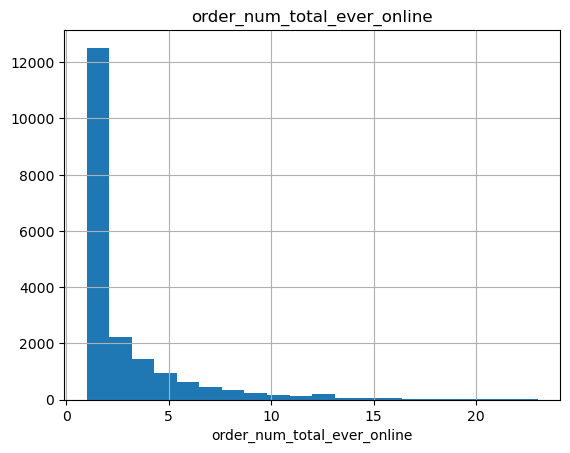

count   19606.000
mean        1.818
std         1.195
min         1.000
1%          1.000
5%          1.000
25%         1.000
50%         1.000
75%         2.000
95%         4.000
99%         6.000
max         8.000
Name: order_num_total_ever_offline, dtype: float64


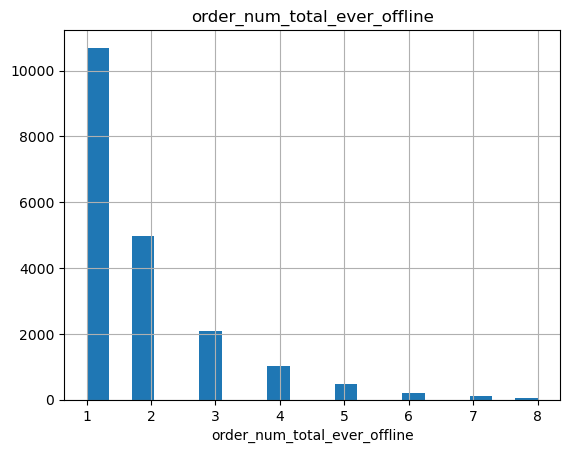

count   19606.000
mean      240.366
std       207.750
min        10.000
1%         19.990
5%         39.990
25%        99.990
50%       179.895
75%       312.882
95%       657.258
99%      1020.350
max      1599.960
Name: customer_value_total_ever_offline, dtype: float64


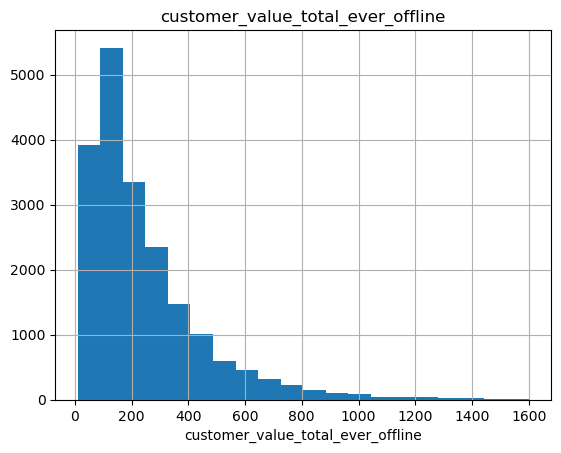

count   19606.000
mean      452.129
std       484.029
min        12.990
1%         39.990
5%         63.990
25%       148.980
50%       283.535
75%       564.642
95%      1436.477
99%      2466.487
max      3596.470
Name: customer_value_total_ever_online, dtype: float64


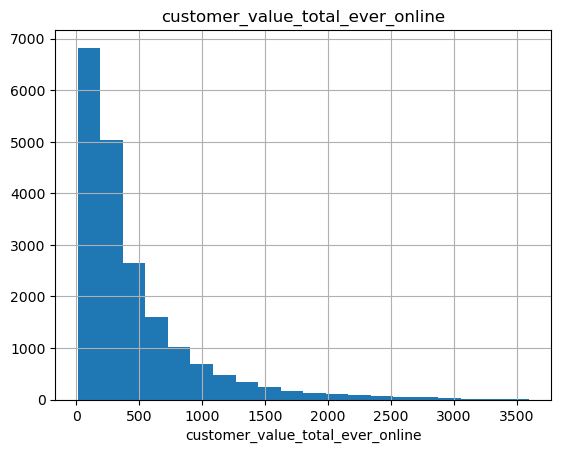

In [25]:
quantiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]
for col in num_cols:
    print(df[col].describe(quantiles).T)
    
    df[col].hist(bins=20)
    plt.xlabel(col)
    plt.title(col)
    plt.show()

In [26]:
df.describe().T

count    mean     std    min     25%     50%     75%      max
order_num_total_ever_online       19606.000   2.884   2.982  1.000   1.000   2.000   3.000   23.000
order_num_total_ever_offline      19606.000   1.818   1.195  1.000   1.000   1.000   2.000    8.000
customer_value_total_ever_offline 19606.000 240.366 207.750 10.000  99.990 179.895 312.882 1599.960
customer_value_total_ever_online  19606.000 452.129 484.029 12.990 148.980 283.535 564.642 3596.470

# Kategorik değişkenlerin analizi

In [27]:
df1=df

In [28]:
df1.shape

(19606, 12)

In [29]:
df=df1.copy()

In [30]:
df.shape

(19606, 12)

In [31]:
df.head()

master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30      2021-02-26             2021-02-21              2021-02-26   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16             2021-02-16              2020-01-10   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App       2019-11-27      2020-11-27             2020-11-27              2019-12-01   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App       2021-01-06      2021-01-17             2021-01-17              2021-01-06   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop       2019-08-03      2021-03-07             2021-03-07              2019-08-03   

   order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online       interested_in_categories_12  
0                        4.000                         1.000                            139.990                           799.380                           [KADIN]  
1                       19.000                         2.000                            159.970                          1853.580  [ERKEK, COCUK, KADIN, AKTIFSPOR]  
2                        3.000                         2.000                            189.970                           395.350                    [ERKEK, KADIN]  
3                        1.000                         1.000                             39.990                            81.980               [AKTIFCOCUK, COCUK]  
4                        1.000                         1.000                             49.990                           159.990                       [AKTIFSPOR]

             order_channel  Ratio
Android App           9317 47.521
Mobile                4827 24.620
Ios App               2759 14.072
Desktop               2703 13.787


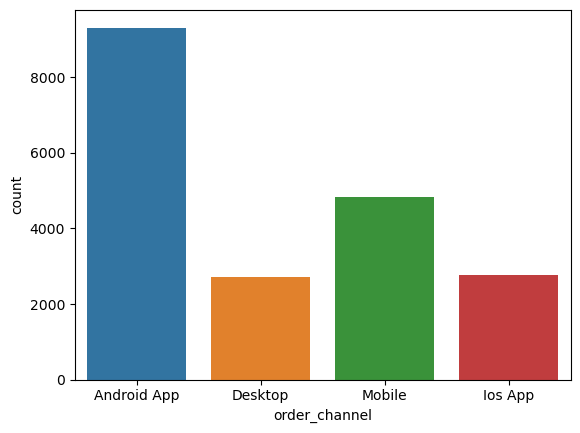

In [32]:
print(pd.DataFrame({"order_channel": df1["order_channel"].value_counts(),"Ratio": 100 * df1["order_channel"].value_counts() / len(df1)}))
sns.countplot(x=df1["order_channel"], data=df1)
plt.show()

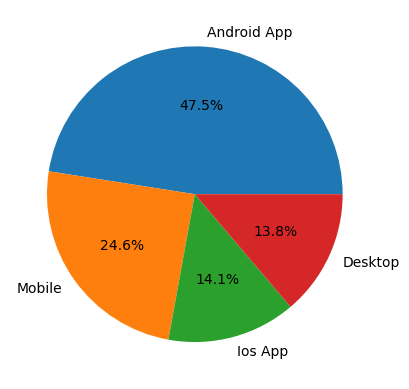

In [33]:
df_order_channel = df.order_channel.value_counts()/df.shape[0]
df_order_channel.head()
plt.pie(df_order_channel,labels=df_order_channel.index,autopct="%.1f%%");

             last_order_channel  Ratio
Android App                6664 33.990
Offline                    6486 33.082
Mobile                     3148 16.056
Ios App                    1663  8.482
Desktop                    1645  8.390


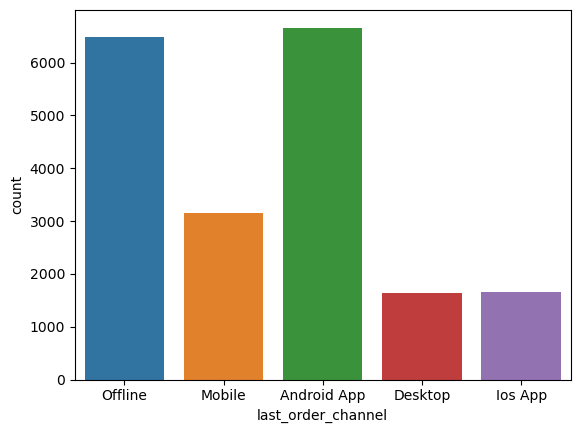

In [34]:
print(pd.DataFrame({"last_order_channel": df1["last_order_channel"].value_counts(),"Ratio": 100 * df1["last_order_channel"].value_counts() / len(df1)}))
sns.countplot(x=df1["last_order_channel"], data=df1)
plt.show()

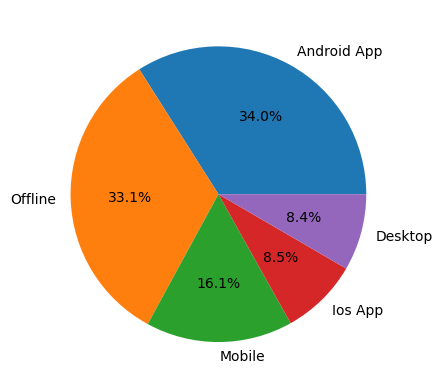

In [35]:
df_last_order_channel = df.last_order_channel.value_counts()/df.shape[0]
df_last_order_channel.head()
plt.pie(df_last_order_channel,labels=df_last_order_channel.index,autopct="%.1f%%");

                                              interested_in_categories_12  Ratio
[AKTIFSPOR]                                                          3435 17.520
[KADIN]                                                              2143 10.930
[]                                                                   2127 10.849
[ERKEK]                                                              1963 10.012
[KADIN, AKTIFSPOR]                                                   1337  6.819
[ERKEK, AKTIFSPOR]                                                   1152  5.876
[ERKEK, KADIN]                                                        834  4.254
[COCUK]                                                               834  4.254
[ERKEK, KADIN, AKTIFSPOR]                                             738  3.764
[AKTIFCOCUK]                                                          679  3.463
[COCUK, KADIN]                                                        437  2.229
[AKTIFCOCUK, COCUK]         

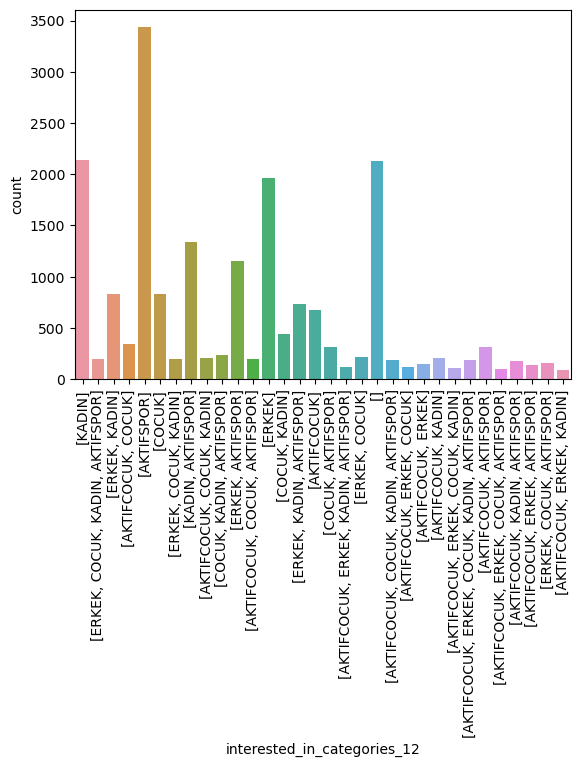

In [36]:
print(pd.DataFrame({"interested_in_categories_12": df1["interested_in_categories_12"].value_counts(),"Ratio": 100 * df1["interested_in_categories_12"].value_counts() / len(df1)}))
sns.countplot(x=df1["interested_in_categories_12"], data=df1)
plt.xticks(rotation=90)
plt.show()

In [37]:
from collections import Counter
import re

# interested_in_categories_12 sütunundaki tüm kategorileri birleştirme
categories = df['interested_in_categories_12'].str.findall(r'\w+')

# Kategori adetlerini hesaplama
category_counts = Counter(categories.sum())

# Her bir kategori adını ve adetlerini gösterme
print("Kategori Adetleri:")
for category in category_counts:
    print(f"{category}: {category_counts[category]}")


Kategori Adetleri:
KADIN: 7373
ERKEK: 6443
COCUK: 4021
AKTIFSPOR: 8959
AKTIFCOCUK: 3299


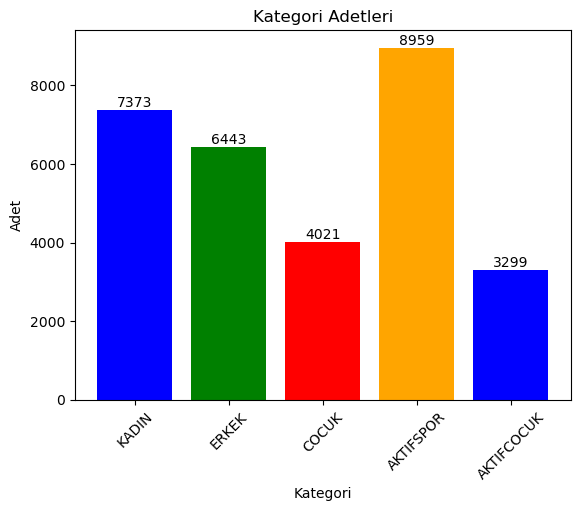

In [38]:
# Kategori adlarını ve adetlerini ayırma
categories = list(category_counts.keys())
counts = list(category_counts.values())

# Renk listesi
colors = ['blue', 'green', 'red', 'orange']

# Çubuk grafiği oluşturma
plt.bar(categories, counts, color=colors)
plt.xlabel("Kategori")
plt.ylabel("Adet")
plt.title("Kategori Adetleri")

# Eksen etiketlerini döndürme
plt.xticks(rotation=45)

# Adetleri çubukların içine yazdırma
for i in range(len(categories)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

# Grafikleri görüntüleme
plt.show()


# NUMERİK DEĞİŞKENLERİN ANALİZİ

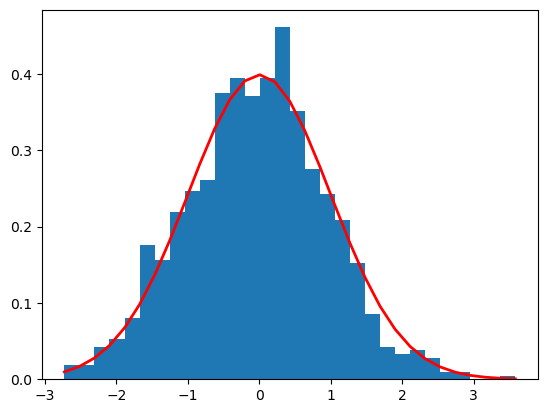

In [39]:
# Normal dağılım verisi oluşturma
mu, sigma = 0, 1 # ortalaması 0, standart sapması 1
flo_df = np.random.normal(mu, sigma, 1000)

# Histogram ile verinin görselleştirilmesi
count, bins, ignored = plt.hist(flo_df, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [40]:
from scipy.stats import shapiro

# Normal dağılım 
mu, sigma = 0, 1 # ortalaması 0, standart sapması 1
flo_df = np.random.normal(mu, sigma, 1000)

# Shapiro-Wilk
stat, p = shapiro(flo_df)
print('İstatistik=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Örneklem Normal Dağılımdan Gelir (H0 reddedilemez)')
else:
    print('Örneklem Normal Dağılımdan Gelmez (H0 reddedilir)')

İstatistik=0.999, p=0.921
Örneklem Normal Dağılımdan Gelir (H0 reddedilemez)


In [41]:
num_cols

['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online']

In [42]:
df.median()

order_num_total_ever_online           2.000
order_num_total_ever_offline          1.000
customer_value_total_ever_offline   179.895
customer_value_total_ever_online    283.535
dtype: float64

In [43]:
df.interested_in_categories_12.value_counts()


[AKTIFSPOR]                                     3435
[KADIN]                                         2143
[]                                              2127
[ERKEK]                                         1963
[KADIN, AKTIFSPOR]                              1337
[ERKEK, AKTIFSPOR]                              1152
[ERKEK, KADIN]                                   834
[COCUK]                                          834
[ERKEK, KADIN, AKTIFSPOR]                        738
[AKTIFCOCUK]                                     679
[COCUK, KADIN]                                   437
[AKTIFCOCUK, COCUK]                              348
[COCUK, AKTIFSPOR]                               316
[AKTIFCOCUK, AKTIFSPOR]                          312
[COCUK, KADIN, AKTIFSPOR]                        233
[ERKEK, COCUK]                                   213
[AKTIFCOCUK, COCUK, KADIN]                       206
[AKTIFCOCUK, KADIN]                              203
[ERKEK, COCUK, KADIN]                         

In [44]:
df_categories = df.interested_in_categories_12.value_counts()/df.shape[0]
df_categories

[AKTIFSPOR]                                    0.175
[KADIN]                                        0.109
[]                                             0.108
[ERKEK]                                        0.100
[KADIN, AKTIFSPOR]                             0.068
[ERKEK, AKTIFSPOR]                             0.059
[ERKEK, KADIN]                                 0.043
[COCUK]                                        0.043
[ERKEK, KADIN, AKTIFSPOR]                      0.038
[AKTIFCOCUK]                                   0.035
[COCUK, KADIN]                                 0.022
[AKTIFCOCUK, COCUK]                            0.018
[COCUK, AKTIFSPOR]                             0.016
[AKTIFCOCUK, AKTIFSPOR]                        0.016
[COCUK, KADIN, AKTIFSPOR]                      0.012
[ERKEK, COCUK]                                 0.011
[AKTIFCOCUK, COCUK, KADIN]                     0.011
[AKTIFCOCUK, KADIN]                            0.010
[ERKEK, COCUK, KADIN]                         

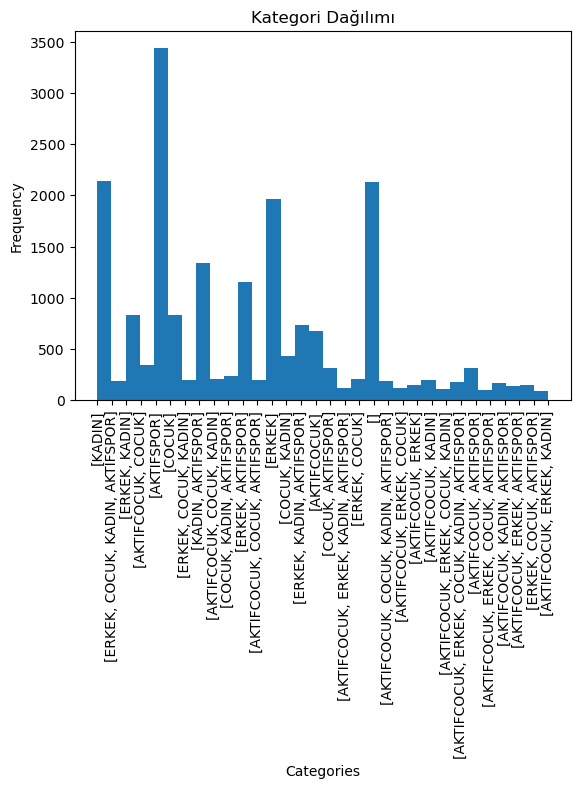

In [45]:
import matplotlib.pyplot as plt


interested_categories = df['interested_in_categories_12']


category_counts = interested_categories.value_counts()

plt.hist(interested_categories, bins=len(category_counts))
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Kategori Dağılımı")
plt.xticks(rotation=90) 
plt.show()


In [46]:
df_kategori_ort=df.groupby("interested_in_categories_12").agg({"order_num_total_ever_online":"mean", "order_num_total_ever_offline":"mean"})

In [47]:
df_kategori_ort.sort_values(by=["order_num_total_ever_online"], ascending=False)            

order_num_total_ever_online  order_num_total_ever_offline
interested_in_categories_12                                                                            
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]                        6.831                         2.869
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]                               6.330                         2.210
[ERKEK, COCUK, KADIN, AKTIFSPOR]                                    5.865                         2.658
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]                               5.216                         2.474
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]                               5.130                         2.380
[ERKEK, COCUK, AKTIFSPOR]                                           4.766                         2.182
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                                   4.500                         2.623
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                                      4.482                         2.182
[ERKEK, KADIN, AKTIFSPOR]                                           4.293                         2.183
[AKTIFCOCUK, ERKEK, COCUK]                                          4.231                         1.992
[AKTIFCOCUK, COCUK, AKTIFSPOR]                                      4.015                         2.128
[AKTIFCOCUK, ERKEK, KADIN]                                          3.977                         1.989
[AKTIFCOCUK, COCUK, KADIN]                                          3.820                         2.335
[ERKEK, COCUK, KADIN]                                               3.793                         2.364
[COCUK, KADIN, AKTIFSPOR]                                           3.773                         2.365
[AKTIFCOCUK, AKTIFSPOR]                                             3.763                         1.920
[AKTIFCOCUK, KADIN, AKTIFSPOR]                                      3.477                         2.333
[ERKEK, AKTIFSPOR]                                                  3.430                         1.823
[AKTIFCOCUK, ERKEK]                                                 3.395                         1.993
[COCUK, AKTIFSPOR]                                                  3.348                         2.025
[COCUK, KADIN]                                                      3.096                         2.128
[KADIN, AKTIFSPOR]                                                  3.043                         1.919
[AKTIFCOCUK, KADIN]                                                 2.995                         2.217
[ERKEK, COCUK]                                                      2.911                         2.033
[ERKEK, KADIN]                                                      2.874                         1.892
[AKTIFCOCUK, COCUK]                                                 2.839                         1.980
[AKTIFCOCUK]                                                        2.417                         1.728
[ERKEK]                                                             2.403                         1.596
[AKTIFSPOR]                                                         2.355                         1.581
[KADIN]                                                             2.328                         1.692
[COCUK]                                                             2.276                         1.777
[]                                                                  2.008                         1.537

In [48]:
df_kategori_ort.sort_values(by=["order_num_total_ever_offline"], ascending=False)     

order_num_total_ever_online  order_num_total_ever_offline
interested_in_categories_12                                                                            
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]                        6.831                         2.869
[ERKEK, COCUK, KADIN, AKTIFSPOR]                                    5.865                         2.658
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                                   4.500                         2.623
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]                               5.216                         2.474
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]                               5.130                         2.380
[COCUK, KADIN, AKTIFSPOR]                                           3.773                         2.365
[ERKEK, COCUK, KADIN]                                               3.793                         2.364
[AKTIFCOCUK, COCUK, KADIN]                                          3.820                         2.335
[AKTIFCOCUK, KADIN, AKTIFSPOR]                                      3.477                         2.333
[AKTIFCOCUK, KADIN]                                                 2.995                         2.217
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]                               6.330                         2.210
[ERKEK, KADIN, AKTIFSPOR]                                           4.293                         2.183
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                                      4.482                         2.182
[ERKEK, COCUK, AKTIFSPOR]                                           4.766                         2.182
[AKTIFCOCUK, COCUK, AKTIFSPOR]                                      4.015                         2.128
[COCUK, KADIN]                                                      3.096                         2.128
[ERKEK, COCUK]                                                      2.911                         2.033
[COCUK, AKTIFSPOR]                                                  3.348                         2.025
[AKTIFCOCUK, ERKEK]                                                 3.395                         1.993
[AKTIFCOCUK, ERKEK, COCUK]                                          4.231                         1.992
[AKTIFCOCUK, ERKEK, KADIN]                                          3.977                         1.989
[AKTIFCOCUK, COCUK]                                                 2.839                         1.980
[AKTIFCOCUK, AKTIFSPOR]                                             3.763                         1.920
[KADIN, AKTIFSPOR]                                                  3.043                         1.919
[ERKEK, KADIN]                                                      2.874                         1.892
[ERKEK, AKTIFSPOR]                                                  3.430                         1.823
[COCUK]                                                             2.276                         1.777
[AKTIFCOCUK]                                                        2.417                         1.728
[KADIN]                                                             2.328                         1.692
[ERKEK]                                                             2.403                         1.596
[AKTIFSPOR]                                                         2.355                         1.581
[]                                                                  2.008                         1.537

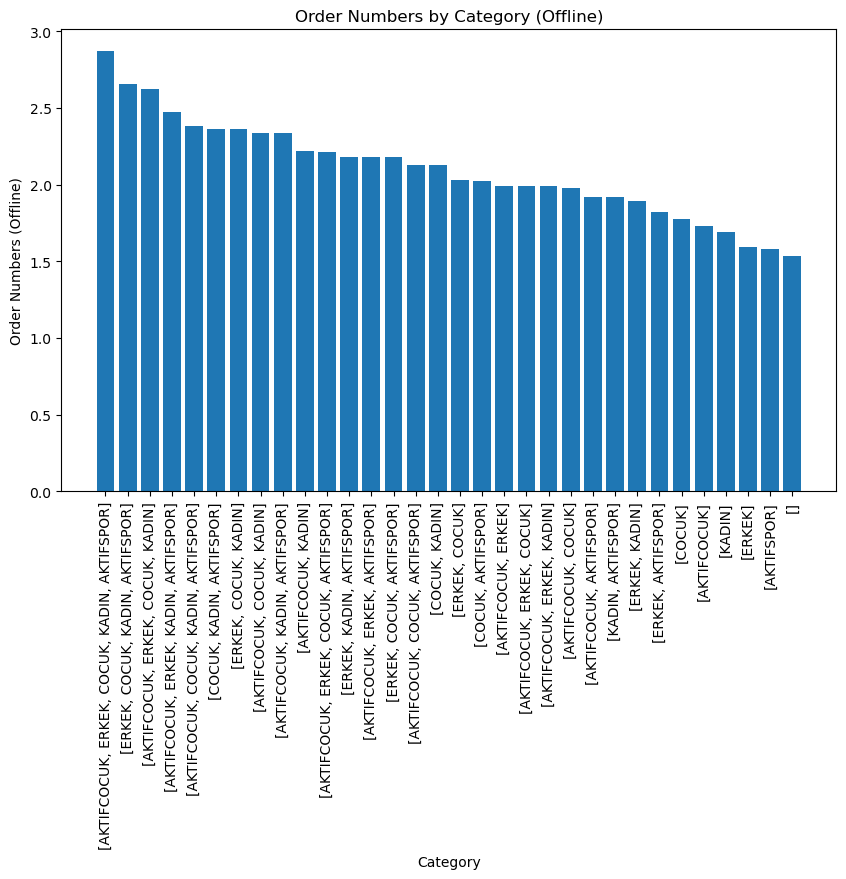

In [49]:
import matplotlib.pyplot as plt

# Sort the DataFrame by "order_num_total_ever_offline"
df_kategori_ort_sorted = df_kategori_ort.sort_values(by="order_num_total_ever_offline", ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_kategori_ort_sorted.index, df_kategori_ort_sorted["order_num_total_ever_offline"])
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed

# Set the title and labels
plt.title("Order Numbers by Category (Offline)")
plt.xlabel("Category")
plt.ylabel("Order Numbers (Offline)")

# Show the plot
plt.show()


In [50]:
df_kategori_top=df.groupby("interested_in_categories_12").agg({"order_num_total_ever_online":"sum", "order_num_total_ever_offline":"sum"})  

In [51]:
df_kategori_top.sort_values(by=["order_num_total_ever_offline"], ascending=False)   

order_num_total_ever_online  order_num_total_ever_offline
interested_in_categories_12                                                                            
[AKTIFSPOR]                                                      8090.000                      5430.000
[KADIN]                                                          4988.000                      3627.000
[]                                                               4272.000                      3270.000
[ERKEK]                                                          4718.000                      3133.000
[KADIN, AKTIFSPOR]                                               4069.000                      2566.000
[ERKEK, AKTIFSPOR]                                               3951.000                      2100.000
[ERKEK, KADIN, AKTIFSPOR]                                        3168.000                      1611.000
[ERKEK, KADIN]                                                   2397.000                      1578.000
[COCUK]                                                          1898.000                      1482.000
[AKTIFCOCUK]                                                     1641.000                      1173.000
[COCUK, KADIN]                                                   1353.000                       930.000
[AKTIFCOCUK, COCUK]                                               988.000                       689.000
[COCUK, AKTIFSPOR]                                               1058.000                       640.000
[AKTIFCOCUK, AKTIFSPOR]                                          1174.000                       599.000
[COCUK, KADIN, AKTIFSPOR]                                         879.000                       551.000
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]                     1250.000                       525.000
[ERKEK, COCUK, KADIN, AKTIFSPOR]                                 1132.000                       513.000
[AKTIFCOCUK, COCUK, KADIN]                                        787.000                       481.000
[ERKEK, COCUK, KADIN]                                             751.000                       468.000
[AKTIFCOCUK, KADIN]                                               608.000                       450.000
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]                             944.000                       438.000
[ERKEK, COCUK]                                                    620.000                       433.000
[AKTIFCOCUK, COCUK, AKTIFSPOR]                                    783.000                       415.000
[AKTIFCOCUK, KADIN, AKTIFSPOR]                                    605.000                       406.000
[ERKEK, COCUK, AKTIFSPOR]                                         734.000                       336.000
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                                    614.000                       299.000
[AKTIFCOCUK, ERKEK]                                               499.000                       293.000
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]                             605.000                       287.000
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                                 477.000                       278.000
[AKTIFCOCUK, ERKEK, COCUK]                                        512.000                       241.000
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]                             633.000                       221.000
[AKTIFCOCUK, ERKEK, KADIN]                                        350.000                       175.000

In [52]:
df_kategori_top.sort_values(by=["order_num_total_ever_online"], ascending=False)   

order_num_total_ever_online  order_num_total_ever_offline
interested_in_categories_12                                                                            
[AKTIFSPOR]                                                      8090.000                      5430.000
[KADIN]                                                          4988.000                      3627.000
[ERKEK]                                                          4718.000                      3133.000
[]                                                               4272.000                      3270.000
[KADIN, AKTIFSPOR]                                               4069.000                      2566.000
[ERKEK, AKTIFSPOR]                                               3951.000                      2100.000
[ERKEK, KADIN, AKTIFSPOR]                                        3168.000                      1611.000
[ERKEK, KADIN]                                                   2397.000                      1578.000
[COCUK]                                                          1898.000                      1482.000
[AKTIFCOCUK]                                                     1641.000                      1173.000
[COCUK, KADIN]                                                   1353.000                       930.000
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]                     1250.000                       525.000
[AKTIFCOCUK, AKTIFSPOR]                                          1174.000                       599.000
[ERKEK, COCUK, KADIN, AKTIFSPOR]                                 1132.000                       513.000
[COCUK, AKTIFSPOR]                                               1058.000                       640.000
[AKTIFCOCUK, COCUK]                                               988.000                       689.000
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]                             944.000                       438.000
[COCUK, KADIN, AKTIFSPOR]                                         879.000                       551.000
[AKTIFCOCUK, COCUK, KADIN]                                        787.000                       481.000
[AKTIFCOCUK, COCUK, AKTIFSPOR]                                    783.000                       415.000
[ERKEK, COCUK, KADIN]                                             751.000                       468.000
[ERKEK, COCUK, AKTIFSPOR]                                         734.000                       336.000
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]                             633.000                       221.000
[ERKEK, COCUK]                                                    620.000                       433.000
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                                    614.000                       299.000
[AKTIFCOCUK, KADIN]                                               608.000                       450.000
[AKTIFCOCUK, KADIN, AKTIFSPOR]                                    605.000                       406.000
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]                             605.000                       287.000
[AKTIFCOCUK, ERKEK, COCUK]                                        512.000                       241.000
[AKTIFCOCUK, ERKEK]                                               499.000                       293.000
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                                 477.000                       278.000
[AKTIFCOCUK, ERKEK, KADIN]                                        350.000                       175.000

In [53]:
df.head()

master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30      2021-02-26             2021-02-21              2021-02-26   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16             2021-02-16              2020-01-10   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App       2019-11-27      2020-11-27             2020-11-27              2019-12-01   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App       2021-01-06      2021-01-17             2021-01-17              2021-01-06   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop       2019-08-03      2021-03-07             2021-03-07              2019-08-03   

   order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online       interested_in_categories_12  
0                        4.000                         1.000                            139.990                           799.380                           [KADIN]  
1                       19.000                         2.000                            159.970                          1853.580  [ERKEK, COCUK, KADIN, AKTIFSPOR]  
2                        3.000                         2.000                            189.970                           395.350                    [ERKEK, KADIN]  
3                        1.000                         1.000                             39.990                            81.980               [AKTIFCOCUK, COCUK]  
4                        1.000                         1.000                             49.990                           159.990                       [AKTIFSPOR]

In [54]:
df_kategori_ort1=df.groupby("interested_in_categories_12").agg({"customer_value_total_ever_online":"mean", "customer_value_total_ever_offline":"mean"})

In [55]:
df_kategori_ort1.sort_values(by=["customer_value_total_ever_offline"], ascending=False)            

customer_value_total_ever_online  customer_value_total_ever_offline
interested_in_categories_12                                                                                      
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]                          1140.849                            378.164
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]                                  886.639                            374.337
[ERKEK, COCUK, KADIN, AKTIFSPOR]                                       901.841                            357.249
[AKTIFCOCUK, KADIN, AKTIFSPOR]                                         594.208                            340.953
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                                      705.593                            330.773
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]                                  869.745                            327.956
[ERKEK, KADIN, AKTIFSPOR]                                              713.642                            326.469
[KADIN, AKTIFSPOR]                                                     497.552                            308.382
[COCUK, KADIN, AKTIFSPOR]                                              622.631                            303.078
[ERKEK, COCUK, KADIN]                                                  562.891                            281.613
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                                         763.119                            281.287
[ERKEK, COCUK, AKTIFSPOR]                                              737.544                            280.744
[AKTIFCOCUK, AKTIFSPOR]                                                632.386                            280.712
[AKTIFCOCUK, ERKEK, KADIN]                                             618.492                            275.215
[AKTIFCOCUK, COCUK, AKTIFSPOR]                                         685.362                            273.624
[ERKEK, AKTIFSPOR]                                                     588.028                            261.338
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]                                 1074.149                            260.909
[AKTIFCOCUK, KADIN]                                                    451.879                            260.710
[AKTIFCOCUK, COCUK, KADIN]                                             520.607                            255.414
[AKTIFCOCUK, ERKEK]                                                    523.159                            249.925
[ERKEK, KADIN]                                                         443.396                            247.712
[COCUK, AKTIFSPOR]                                                     514.894                            246.801
[AKTIFCOCUK, ERKEK, COCUK]                                             630.702                            243.626
[AKTIFSPOR]                                                            414.864                            241.700
[COCUK, KADIN]                                                         419.957                            229.420
[ERKEK, COCUK]                                                         448.324                            212.166
[AKTIFCOCUK, COCUK]                                                    402.903                            208.050
[]                                                                     320.108                            201.404
[ERKEK]                                                                347.103                            197.683
[KADIN]                                                                307.942                            197.414
[AKTIFCOCUK]                                                           326.088                            194.741
[COCUK]                                                                277.290                            175.599

In [56]:
df_kategori_ort1.sort_values(by=["customer_value_total_ever_online"], ascending=False)  

customer_value_total_ever_online  customer_value_total_ever_offline
interested_in_categories_12                                                                                      
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]                          1140.849                            378.164
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]                                 1074.149                            260.909
[ERKEK, COCUK, KADIN, AKTIFSPOR]                                       901.841                            357.249
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]                                  886.639                            374.337
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]                                  869.745                            327.956
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                                         763.119                            281.287
[ERKEK, COCUK, AKTIFSPOR]                                              737.544                            280.744
[ERKEK, KADIN, AKTIFSPOR]                                              713.642                            326.469
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                                      705.593                            330.773
[AKTIFCOCUK, COCUK, AKTIFSPOR]                                         685.362                            273.624
[AKTIFCOCUK, AKTIFSPOR]                                                632.386                            280.712
[AKTIFCOCUK, ERKEK, COCUK]                                             630.702                            243.626
[COCUK, KADIN, AKTIFSPOR]                                              622.631                            303.078
[AKTIFCOCUK, ERKEK, KADIN]                                             618.492                            275.215
[AKTIFCOCUK, KADIN, AKTIFSPOR]                                         594.208                            340.953
[ERKEK, AKTIFSPOR]                                                     588.028                            261.338
[ERKEK, COCUK, KADIN]                                                  562.891                            281.613
[AKTIFCOCUK, ERKEK]                                                    523.159                            249.925
[AKTIFCOCUK, COCUK, KADIN]                                             520.607                            255.414
[COCUK, AKTIFSPOR]                                                     514.894                            246.801
[KADIN, AKTIFSPOR]                                                     497.552                            308.382
[AKTIFCOCUK, KADIN]                                                    451.879                            260.710
[ERKEK, COCUK]                                                         448.324                            212.166
[ERKEK, KADIN]                                                         443.396                            247.712
[COCUK, KADIN]                                                         419.957                            229.420
[AKTIFSPOR]                                                            414.864                            241.700
[AKTIFCOCUK, COCUK]                                                    402.903                            208.050
[ERKEK]                                                                347.103                            197.683
[AKTIFCOCUK]                                                           326.088                            194.741
[]                                                                     320.108                            201.404
[KADIN]                                                                307.942                            197.414
[COCUK]                                                                277.290                            175.599

In [57]:
df_kategori_top1=df.groupby("interested_in_categories_12").agg({"customer_value_total_ever_online":"sum", "customer_value_total_ever_offline":"sum"})

In [58]:
df_kategori_top1.sort_values(by=["customer_value_total_ever_offline"], ascending=False)  

customer_value_total_ever_online  customer_value_total_ever_offline
interested_in_categories_12                                                                                      
[AKTIFSPOR]                                                        1425056.140                         830238.920
[]                                                                  680869.840                         428386.480
[KADIN]                                                             659920.030                         423058.400
[KADIN, AKTIFSPOR]                                                  665227.270                         412307.070
[ERKEK]                                                             681362.910                         388051.520
[ERKEK, AKTIFSPOR]                                                  677407.720                         301061.640
[ERKEK, KADIN, AKTIFSPOR]                                           526667.660                         240933.970
[ERKEK, KADIN]                                                      369792.520                         206591.470
[COCUK]                                                             231259.520                         146449.410
[AKTIFCOCUK]                                                        221413.420                         132229.410
[COCUK, KADIN]                                                      183521.080                         100256.480
[AKTIFCOCUK, AKTIFSPOR]                                             197304.550                          87582.000
[COCUK, AKTIFSPOR]                                                  162706.580                          77989.110
[AKTIFCOCUK, COCUK]                                                 140210.150                          72401.490
[COCUK, KADIN, AKTIFSPOR]                                           145072.970                          70617.290
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]                        208775.320                          69204.060
[ERKEK, COCUK, KADIN, AKTIFSPOR]                                    174055.330                          68949.040
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]                               160033.080                          60343.820
[AKTIFCOCUK, KADIN, AKTIFSPOR]                                      103392.200                          59325.880
[ERKEK, COCUK, KADIN]                                               111452.320                          55759.400
[AKTIFCOCUK, COCUK, AKTIFSPOR]                                      133645.550                          53356.600
[AKTIFCOCUK, KADIN]                                                  91731.480                          52924.230
[AKTIFCOCUK, COCUK, KADIN]                                          107245.090                          52615.200
[ERKEK, COCUK]                                                       95493.090                          45191.380
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]                               102850.070                          43423.110
[ERKEK, COCUK, AKTIFSPOR]                                           113581.760                          43234.640
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                                      104547.330                          38536.360
[AKTIFCOCUK, ERKEK]                                                  76904.390                          36739.010
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                                    74792.860                          35061.950
[AKTIFCOCUK, ERKEK, COCUK]                                           76314.970                          29478.800
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]                               107414.850                          26090.910
[AKTIFCOCUK, ERKEK, KADIN]                                           54427.340                          24218.930

In [59]:
df_kategori_top1.sort_values(by=["customer_value_total_ever_online"], ascending=False)  

customer_value_total_ever_online  customer_value_total_ever_offline
interested_in_categories_12                                                                                      
[AKTIFSPOR]                                                        1425056.140                         830238.920
[ERKEK]                                                             681362.910                         388051.520
[]                                                                  680869.840                         428386.480
[ERKEK, AKTIFSPOR]                                                  677407.720                         301061.640
[KADIN, AKTIFSPOR]                                                  665227.270                         412307.070
[KADIN]                                                             659920.030                         423058.400
[ERKEK, KADIN, AKTIFSPOR]                                           526667.660                         240933.970
[ERKEK, KADIN]                                                      369792.520                         206591.470
[COCUK]                                                             231259.520                         146449.410
[AKTIFCOCUK]                                                        221413.420                         132229.410
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]                        208775.320                          69204.060
[AKTIFCOCUK, AKTIFSPOR]                                             197304.550                          87582.000
[COCUK, KADIN]                                                      183521.080                         100256.480
[ERKEK, COCUK, KADIN, AKTIFSPOR]                                    174055.330                          68949.040
[COCUK, AKTIFSPOR]                                                  162706.580                          77989.110
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]                               160033.080                          60343.820
[COCUK, KADIN, AKTIFSPOR]                                           145072.970                          70617.290
[AKTIFCOCUK, COCUK]                                                 140210.150                          72401.490
[AKTIFCOCUK, COCUK, AKTIFSPOR]                                      133645.550                          53356.600
[ERKEK, COCUK, AKTIFSPOR]                                           113581.760                          43234.640
[ERKEK, COCUK, KADIN]                                               111452.320                          55759.400
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]                               107414.850                          26090.910
[AKTIFCOCUK, COCUK, KADIN]                                          107245.090                          52615.200
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                                      104547.330                          38536.360
[AKTIFCOCUK, KADIN, AKTIFSPOR]                                      103392.200                          59325.880
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]                               102850.070                          43423.110
[ERKEK, COCUK]                                                       95493.090                          45191.380
[AKTIFCOCUK, KADIN]                                                  91731.480                          52924.230
[AKTIFCOCUK, ERKEK]                                                  76904.390                          36739.010
[AKTIFCOCUK, ERKEK, COCUK]                                           76314.970                          29478.800
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                                    74792.860                          35061.950
[AKTIFCOCUK, ERKEK, KADIN]                                           54427.340                          24218.930

In [60]:
df_channel_sum=df.groupby("order_channel").sum() 

In [61]:
df_channel_sum.sort_values(by=["customer_value_total_ever_online"], ascending=False)            

order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online
order_channel                                                                                                                                
Android App                      30851.000                     17043.000                        2184594.180                       4870690.760
Mobile                           11694.000                      8720.000                        1143128.670                       1708203.810
Ios App                           8654.000                      4895.000                         687098.420                       1482910.030
Desktop                           5349.000                      4980.000                         697786.710                        802644.790

In [62]:
df_channel_sum.sort_values(by=["order_num_total_ever_online"], ascending=False)   

order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online
order_channel                                                                                                                                
Android App                      30851.000                     17043.000                        2184594.180                       4870690.760
Mobile                           11694.000                      8720.000                        1143128.670                       1708203.810
Ios App                           8654.000                      4895.000                         687098.420                       1482910.030
Desktop                           5349.000                      4980.000                         697786.710                        802644.790

In [63]:
df_channel_mean=df.groupby("order_channel").mean() 

In [64]:
df_channel_mean.sort_values(by=["customer_value_total_ever_online"], ascending=False)  

order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online
order_channel                                                                                                                                
Ios App                              3.137                         1.774                            249.039                           537.481
Android App                          3.311                         1.829                            234.474                           522.775
Mobile                               2.423                         1.807                            236.820                           353.885
Desktop                              1.979                         1.842                            258.153                           296.946

In [65]:
df_channel_mean.sort_values(by=["order_num_total_ever_online"], ascending=False)   

order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online
order_channel                                                                                                                                
Android App                          3.311                         1.829                            234.474                           522.775
Ios App                              3.137                         1.774                            249.039                           537.481
Mobile                               2.423                         1.807                            236.820                           353.885
Desktop                              1.979                         1.842                            258.153                           296.946

In [66]:
df_lastchannel_mean=df.groupby("last_order_channel").mean() 

In [67]:
df_lastchannel_mean.sort_values(by=["customer_value_total_ever_offline"], ascending=False) 

order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online
last_order_channel                                                                                                                                
Offline                                   2.218                         2.158                            305.822                           319.778
Ios App                                   3.061                         1.622                            216.826                           543.557
Desktop                                   3.321                         1.619                            210.715                           530.310
Android App                               3.460                         1.694                            208.889                           554.402
Mobile                                    2.717                         1.586                            200.064                           419.166

In [68]:
df_lastchannel_mean.sort_values(by=["customer_value_total_ever_online"], ascending=False) 

order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online
last_order_channel                                                                                                                                
Android App                               3.460                         1.694                            208.889                           554.402
Ios App                                   3.061                         1.622                            216.826                           543.557
Desktop                                   3.321                         1.619                            210.715                           530.310
Mobile                                    2.717                         1.586                            200.064                           419.166
Offline                                   2.218                         2.158                            305.822                           319.778

In [69]:
df_lastchannel_mean.sort_values(by=["order_num_total_ever_online"], ascending=False)  

order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online
last_order_channel                                                                                                                                
Android App                               3.460                         1.694                            208.889                           554.402
Desktop                                   3.321                         1.619                            210.715                           530.310
Ios App                                   3.061                         1.622                            216.826                           543.557
Mobile                                    2.717                         1.586                            200.064                           419.166
Offline                                   2.218                         2.158                            305.822                           319.778

In [70]:
df_genel_sayı=df.groupby(["interested_in_categories_12", "order_channel"]).mean()

In [71]:

df_genel_sayı.sort_values(by=["order_num_total_ever_online"], ascending=False) 

order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  \
interested_in_categories_12                  order_channel                                                                                                 
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR] Ios App                              9.059                         2.765                            377.914   
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]        Ios App                              7.071                         2.357                            376.961   
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR] Android App                          6.993                         2.764                            369.970   
[ERKEK, COCUK, AKTIFSPOR]                    Ios App                              6.778                         2.037                            243.873   
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]        Android App                          6.653                         2.181                            234.334   
[ERKEK, COCUK, KADIN, AKTIFSPOR]             Ios App                              6.645                         2.903                            401.561   
                                             Android App                          6.172                         2.469                            319.460   
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR] Mobile                               6.143                         3.429                            403.886   
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]        Ios App                              6.125                         2.312                            447.691   
                                             Android App                          6.114                         2.043                            292.146   
[AKTIFCOCUK, ERKEK, COCUK]                   Desktop                              6.000                         2.000                            192.145   
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]        Ios App                              5.905                         1.857                            317.020   
                                             Android App                          5.620                         2.324                            304.337   
[ERKEK, COCUK, KADIN, AKTIFSPOR]             Mobile                               5.200                         2.950                            443.256   
[AKTIFCOCUK, ERKEK, COCUK, KADIN]            Android App                          5.133                         2.517                            323.015   
[ERKEK, KADIN, AKTIFSPOR]                    Android App                          4.862                         2.077                            295.546   
[ERKEK, COCUK, KADIN]                        Ios App                              4.636                         2.182                            231.970   
[AKTIFCOCUK, ERKEK, AKTIFSPOR]               Android App                          4.635                         1.847                            224.228   
[AKTIFCOCUK, COCUK, AKTIFSPOR]               Android App                          4.508                         2.000                            249.369   
[COCUK, KADIN, AKTIFSPOR]                    Android App                          4.480                         2.240                            271.549   
[AKTIFCOCUK, ERKEK, KADIN]                   Ios App                              4.417                         2.333                            409.579   
[ERKEK, COCUK, AKTIFSPOR]                    Android App                          4.400                         2.116                            284.056   
[AKTIFCOCUK, ERKEK, AKTIFSPOR]               Mobile                               4.385                         2.808                            429.627   
[AKTIFCOCUK, ERKEK, COCUK]                   Android App                          4.375                         2.069                            244.597   
[AKT

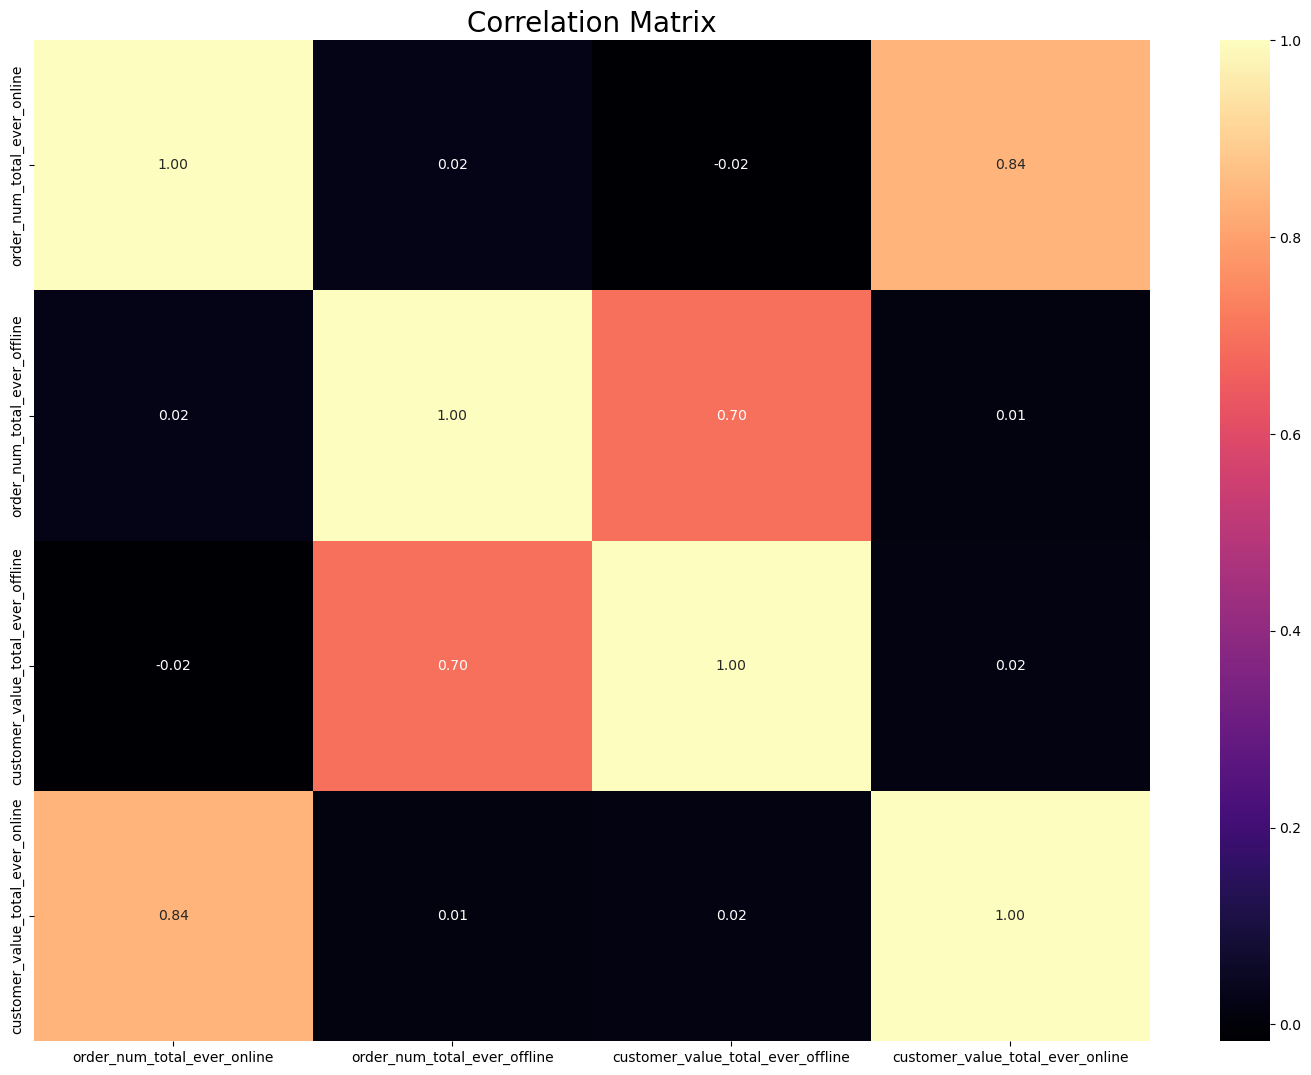

In [72]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

#NEW FEATURES

In [73]:
import datetime as dt

# yeni değişkenlerin groupby grafikleri eklenecek


In [74]:
#toplam sipariş 

df["total_order"]=df["order_num_total_ever_online"]+df["order_num_total_ever_offline"]
df["total_revenue"]=df["customer_value_total_ever_online"]+df["customer_value_total_ever_offline"]
df["last_order_date"] = pd.to_datetime(df["last_order_date"])
df["first_order_date"] = pd.to_datetime(df["first_order_date"])
diff = df["last_order_date"] - df["first_order_date"]

In [75]:
df["basket_size"]=df["total_revenue"]/df["total_order"]

In [76]:
df.head()

master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30      2021-02-26             2021-02-21              2021-02-26   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16             2021-02-16              2020-01-10   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App       2019-11-27      2020-11-27             2020-11-27              2019-12-01   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App       2021-01-06      2021-01-17             2021-01-17              2021-01-06   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop       2019-08-03      2021-03-07             2021-03-07              2019-08-03   

   order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online       interested_in_categories_12  \
0                        4.000                         1.000                            139.990                           799.380                           [KADIN]   
1                       19.000                         2.000                            159.970                          1853.580  [ERKEK, COCUK, KADIN, AKTIFSPOR]   
2                        3.000                         2.000                            189.970                           395.350                    [ERKEK, KADIN]   
3                        1.000                         1.000                             39.990                            81.980               [AKTIFCOCUK, COCUK]   
4                        1.000                         1.000                             49.990                           159.990                       [AKTIFSPOR]   

   total_order  total_revenue  basket_size  
0        5.000        939.370      187.874  
1       21.000       2013.550       95.883  
2        5.000        585.320      117.064  
3        2.000        121.970       60.985  
4        2.000        209.980      104.990

In [77]:
df_cat_mean=df.groupby("interested_in_categories_12").agg({
    "total_revenue": "mean",
    "total_order":"mean", "basket_size" :"mean"})

In [78]:
df_cat_mean.sort_values(by=["total_revenue"], ascending=False) 

total_revenue  total_order  basket_size
interested_in_categories_12                                                          
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]       1519.013        9.699      166.176
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]              1335.058        8.540      157.985
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]              1260.976        7.690      174.115
[ERKEK, COCUK, KADIN, AKTIFSPOR]                   1259.090        8.523      155.568
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]              1197.701        7.511      168.975
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                     1044.406        6.664      163.667
[ERKEK, KADIN, AKTIFSPOR]                          1040.111        6.476      172.699
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                  1036.366        7.123      152.467
[ERKEK, COCUK, AKTIFSPOR]                          1018.288        6.948      155.049
[AKTIFCOCUK, COCUK, AKTIFSPOR]                      958.985        6.144      165.345
[AKTIFCOCUK, KADIN, AKTIFSPOR]                      935.161        5.810      164.314
[COCUK, KADIN, AKTIFSPOR]                           925.709        6.137      157.544
[AKTIFCOCUK, AKTIFSPOR]                             913.098        5.683      168.837
[AKTIFCOCUK, ERKEK, KADIN]                          893.708        5.966      154.679
[AKTIFCOCUK, ERKEK, COCUK]                          874.329        6.223      145.932
[ERKEK, AKTIFSPOR]                                  849.366        5.253      169.020
[ERKEK, COCUK, KADIN]                               844.504        6.157      147.383
[KADIN, AKTIFSPOR]                                  805.934        4.963      171.752
[AKTIFCOCUK, COCUK, KADIN]                          776.021        6.155      130.943
[AKTIFCOCUK, ERKEK]                                 773.084        5.388      147.783
[COCUK, AKTIFSPOR]                                  761.695        5.373      146.628
[AKTIFCOCUK, KADIN]                                 712.590        5.212      135.815
[ERKEK, KADIN]                                      691.108        4.766      149.354
[ERKEK, COCUK]                                      660.490        4.944      133.323
[AKTIFSPOR]                                         656.563        3.936      173.033
[COCUK, KADIN]                                      649.377        5.224      127.959
[AKTIFCOCUK, COCUK]                                 610.953        4.819      129.811
[ERKEK]                                             544.786        3.999      137.297
[]                                                  521.512        3.546      151.118
[AKTIFCOCUK]                                        520.829        4.144      126.207
[KADIN]                                             505.356        4.020      126.980
[COCUK]                                             452.888        4.053      110.566

In [79]:
df_cat_mean.sort_values(by=["total_order"], ascending=False) 

total_revenue  total_order  basket_size
interested_in_categories_12                                                          
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]       1519.013        9.699      166.176
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]              1335.058        8.540      157.985
[ERKEK, COCUK, KADIN, AKTIFSPOR]                   1259.090        8.523      155.568
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]              1260.976        7.690      174.115
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]              1197.701        7.511      168.975
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                  1036.366        7.123      152.467
[ERKEK, COCUK, AKTIFSPOR]                          1018.288        6.948      155.049
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                     1044.406        6.664      163.667
[ERKEK, KADIN, AKTIFSPOR]                          1040.111        6.476      172.699
[AKTIFCOCUK, ERKEK, COCUK]                          874.329        6.223      145.932
[ERKEK, COCUK, KADIN]                               844.504        6.157      147.383
[AKTIFCOCUK, COCUK, KADIN]                          776.021        6.155      130.943
[AKTIFCOCUK, COCUK, AKTIFSPOR]                      958.985        6.144      165.345
[COCUK, KADIN, AKTIFSPOR]                           925.709        6.137      157.544
[AKTIFCOCUK, ERKEK, KADIN]                          893.708        5.966      154.679
[AKTIFCOCUK, KADIN, AKTIFSPOR]                      935.161        5.810      164.314
[AKTIFCOCUK, AKTIFSPOR]                             913.098        5.683      168.837
[AKTIFCOCUK, ERKEK]                                 773.084        5.388      147.783
[COCUK, AKTIFSPOR]                                  761.695        5.373      146.628
[ERKEK, AKTIFSPOR]                                  849.366        5.253      169.020
[COCUK, KADIN]                                      649.377        5.224      127.959
[AKTIFCOCUK, KADIN]                                 712.590        5.212      135.815
[KADIN, AKTIFSPOR]                                  805.934        4.963      171.752
[ERKEK, COCUK]                                      660.490        4.944      133.323
[AKTIFCOCUK, COCUK]                                 610.953        4.819      129.811
[ERKEK, KADIN]                                      691.108        4.766      149.354
[AKTIFCOCUK]                                        520.829        4.144      126.207
[COCUK]                                             452.888        4.053      110.566
[KADIN]                                             505.356        4.020      126.980
[ERKEK]                                             544.786        3.999      137.297
[AKTIFSPOR]                                         656.563        3.936      173.033
[]                                                  521.512        3.546      151.118

In [80]:
df_cat_sum=df.groupby("interested_in_categories_12").agg({
    "total_revenue": "sum",
    "total_order": "sum", "basket_size" :"mean"})

In [81]:
df_cat_sum.sort_values(by=["total_revenue"], ascending=False) 

total_revenue  total_order  basket_size
interested_in_categories_12                                                          
[AKTIFSPOR]                                     2255295.060    13520.000      173.033
[]                                              1109256.320     7542.000      151.118
[KADIN]                                         1082978.430     8615.000      126.980
[KADIN, AKTIFSPOR]                              1077534.340     6635.000      171.752
[ERKEK]                                         1069414.430     7851.000      137.297
[ERKEK, AKTIFSPOR]                               978469.360     6051.000      169.020
[ERKEK, KADIN, AKTIFSPOR]                        767601.630     4779.000      172.699
[ERKEK, KADIN]                                   576383.990     3975.000      149.354
[COCUK]                                          377708.930     3380.000      110.566
[AKTIFCOCUK]                                     353642.830     2814.000      126.207
[AKTIFCOCUK, AKTIFSPOR]                          284886.550     1773.000      168.837
[COCUK, KADIN]                                   283777.560     2283.000      127.959
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]     277979.380     1775.000      166.176
[ERKEK, COCUK, KADIN, AKTIFSPOR]                 243004.370     1645.000      155.568
[COCUK, AKTIFSPOR]                               240695.690     1698.000      146.628
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]            220376.900     1382.000      168.975
[COCUK, KADIN, AKTIFSPOR]                        215690.260     1430.000      157.544
[AKTIFCOCUK, COCUK]                              212611.640     1677.000      129.811
[AKTIFCOCUK, COCUK, AKTIFSPOR]                   187002.150     1198.000      165.345
[ERKEK, COCUK, KADIN]                            167211.720     1219.000      147.383
[AKTIFCOCUK, KADIN, AKTIFSPOR]                   162718.080     1011.000      164.314
[AKTIFCOCUK, COCUK, KADIN]                       159860.290     1268.000      130.943
[ERKEK, COCUK, AKTIFSPOR]                        156816.400     1070.000      155.049
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]            146273.180      892.000      174.115
[AKTIFCOCUK, KADIN]                              144655.710     1058.000      135.815
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                   143083.690      913.000      163.667
[ERKEK, COCUK]                                   140684.470     1053.000      133.323
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]            133505.760      854.000      157.985
[AKTIFCOCUK, ERKEK]                              113643.400      792.000      147.783
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                109854.810      755.000      152.467
[AKTIFCOCUK, ERKEK, COCUK]                       105793.770      753.000      145.932
[AKTIFCOCUK, ERKEK, KADIN]                        78646.270      525.000      154.679

In [82]:
df_cat_sum.sort_values(by=["total_order"], ascending=False) 

total_revenue  total_order  basket_size
interested_in_categories_12                                                          
[AKTIFSPOR]                                     2255295.060    13520.000      173.033
[KADIN]                                         1082978.430     8615.000      126.980
[ERKEK]                                         1069414.430     7851.000      137.297
[]                                              1109256.320     7542.000      151.118
[KADIN, AKTIFSPOR]                              1077534.340     6635.000      171.752
[ERKEK, AKTIFSPOR]                               978469.360     6051.000      169.020
[ERKEK, KADIN, AKTIFSPOR]                        767601.630     4779.000      172.699
[ERKEK, KADIN]                                   576383.990     3975.000      149.354
[COCUK]                                          377708.930     3380.000      110.566
[AKTIFCOCUK]                                     353642.830     2814.000      126.207
[COCUK, KADIN]                                   283777.560     2283.000      127.959
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]     277979.380     1775.000      166.176
[AKTIFCOCUK, AKTIFSPOR]                          284886.550     1773.000      168.837
[COCUK, AKTIFSPOR]                               240695.690     1698.000      146.628
[AKTIFCOCUK, COCUK]                              212611.640     1677.000      129.811
[ERKEK, COCUK, KADIN, AKTIFSPOR]                 243004.370     1645.000      155.568
[COCUK, KADIN, AKTIFSPOR]                        215690.260     1430.000      157.544
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]            220376.900     1382.000      168.975
[AKTIFCOCUK, COCUK, KADIN]                       159860.290     1268.000      130.943
[ERKEK, COCUK, KADIN]                            167211.720     1219.000      147.383
[AKTIFCOCUK, COCUK, AKTIFSPOR]                   187002.150     1198.000      165.345
[ERKEK, COCUK, AKTIFSPOR]                        156816.400     1070.000      155.049
[AKTIFCOCUK, KADIN]                              144655.710     1058.000      135.815
[ERKEK, COCUK]                                   140684.470     1053.000      133.323
[AKTIFCOCUK, KADIN, AKTIFSPOR]                   162718.080     1011.000      164.314
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                   143083.690      913.000      163.667
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]            146273.180      892.000      174.115
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]            133505.760      854.000      157.985
[AKTIFCOCUK, ERKEK]                              113643.400      792.000      147.783
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                109854.810      755.000      152.467
[AKTIFCOCUK, ERKEK, COCUK]                       105793.770      753.000      145.932
[AKTIFCOCUK, ERKEK, KADIN]                        78646.270      525.000      154.679

In [83]:
df_cat_mean.sort_values(by=["basket_size"], ascending=False) 

total_revenue  total_order  basket_size
interested_in_categories_12                                                          
[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]              1260.976        7.690      174.115
[AKTIFSPOR]                                         656.563        3.936      173.033
[ERKEK, KADIN, AKTIFSPOR]                          1040.111        6.476      172.699
[KADIN, AKTIFSPOR]                                  805.934        4.963      171.752
[ERKEK, AKTIFSPOR]                                  849.366        5.253      169.020
[AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]              1197.701        7.511      168.975
[AKTIFCOCUK, AKTIFSPOR]                             913.098        5.683      168.837
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]       1519.013        9.699      166.176
[AKTIFCOCUK, COCUK, AKTIFSPOR]                      958.985        6.144      165.345
[AKTIFCOCUK, KADIN, AKTIFSPOR]                      935.161        5.810      164.314
[AKTIFCOCUK, ERKEK, AKTIFSPOR]                     1044.406        6.664      163.667
[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]              1335.058        8.540      157.985
[COCUK, KADIN, AKTIFSPOR]                           925.709        6.137      157.544
[ERKEK, COCUK, KADIN, AKTIFSPOR]                   1259.090        8.523      155.568
[ERKEK, COCUK, AKTIFSPOR]                          1018.288        6.948      155.049
[AKTIFCOCUK, ERKEK, KADIN]                          893.708        5.966      154.679
[AKTIFCOCUK, ERKEK, COCUK, KADIN]                  1036.366        7.123      152.467
[]                                                  521.512        3.546      151.118
[ERKEK, KADIN]                                      691.108        4.766      149.354
[AKTIFCOCUK, ERKEK]                                 773.084        5.388      147.783
[ERKEK, COCUK, KADIN]                               844.504        6.157      147.383
[COCUK, AKTIFSPOR]                                  761.695        5.373      146.628
[AKTIFCOCUK, ERKEK, COCUK]                          874.329        6.223      145.932
[ERKEK]                                             544.786        3.999      137.297
[AKTIFCOCUK, KADIN]                                 712.590        5.212      135.815
[ERKEK, COCUK]                                      660.490        4.944      133.323
[AKTIFCOCUK, COCUK, KADIN]                          776.021        6.155      130.943
[AKTIFCOCUK, COCUK]                                 610.953        4.819      129.811
[COCUK, KADIN]                                      649.377        5.224      127.959
[KADIN]                                             505.356        4.020      126.980
[AKTIFCOCUK]                                        520.829        4.144      126.207
[COCUK]                                             452.888        4.053      110.566

In [84]:
df_channel_mean=df.groupby("order_channel").agg({
    "total_revenue": "mean",
    "total_order": "mean", "basket_size":"mean"})

In [85]:
df_channel_mean.sort_values(by=["total_revenue"], ascending=False) 

total_revenue  total_order  basket_size
order_channel                                         
Ios App              786.520        4.911      166.086
Android App          757.249        5.140      150.571
Mobile               590.705        4.229      144.830
Desktop              555.099        3.821      149.553

In [86]:
df_channel_mean.sort_values(by=["total_order"], ascending=False) 

total_revenue  total_order  basket_size
order_channel                                         
Android App          757.249        5.140      150.571
Ios App              786.520        4.911      166.086
Mobile               590.705        4.229      144.830
Desktop              555.099        3.821      149.553

In [87]:
df_channel_sum=df.groupby("order_channel").agg({
    "total_revenue": "sum",
    "total_order": "sum"})

In [88]:
df_channel_sum.sort_values(by=["total_revenue"], ascending=False) 

total_revenue  total_order
order_channel                            
Android App      7055284.940    47894.000
Mobile           2851332.480    20414.000
Ios App          2170008.450    13549.000
Desktop          1500431.500    10329.000

In [89]:
df_channel_sum.sort_values(by=["total_order"], ascending=False) 

total_revenue  total_order
order_channel                            
Android App      7055284.940    47894.000
Mobile           2851332.480    20414.000
Ios App          2170008.450    13549.000
Desktop          1500431.500    10329.000

In [90]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [91]:
df[num_cols].corr()

order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online  \
order_num_total_ever_online                              1.000                         0.025                             -0.017                             0.841   
order_num_total_ever_offline                             0.025                         1.000                              0.696                             0.012   
customer_value_total_ever_offline                       -0.017                         0.696                              1.000                             0.018   
customer_value_total_ever_online                         0.841                         0.012                              0.018                             1.000   
total_order                                              0.930                         0.392                              0.241                             0.778   
total_revenue                                            0.761                         0.283                              0.409                             0.920   
basket_size                                             -0.048                        -0.098                              0.355                             0.325   

                                   total_order  total_revenue  basket_size  
order_num_total_ever_online              0.930          0.761       -0.048  
order_num_total_ever_offline             0.392          0.283       -0.098  
customer_value_total_ever_offline        0.241          0.409        0.355  
customer_value_total_ever_online         0.778          0.920        0.325  
total_order                              1.000          0.805       -0.080  
total_revenue                            0.805          1.000        0.436  
basket_size                             -0.080          0.436        1.000

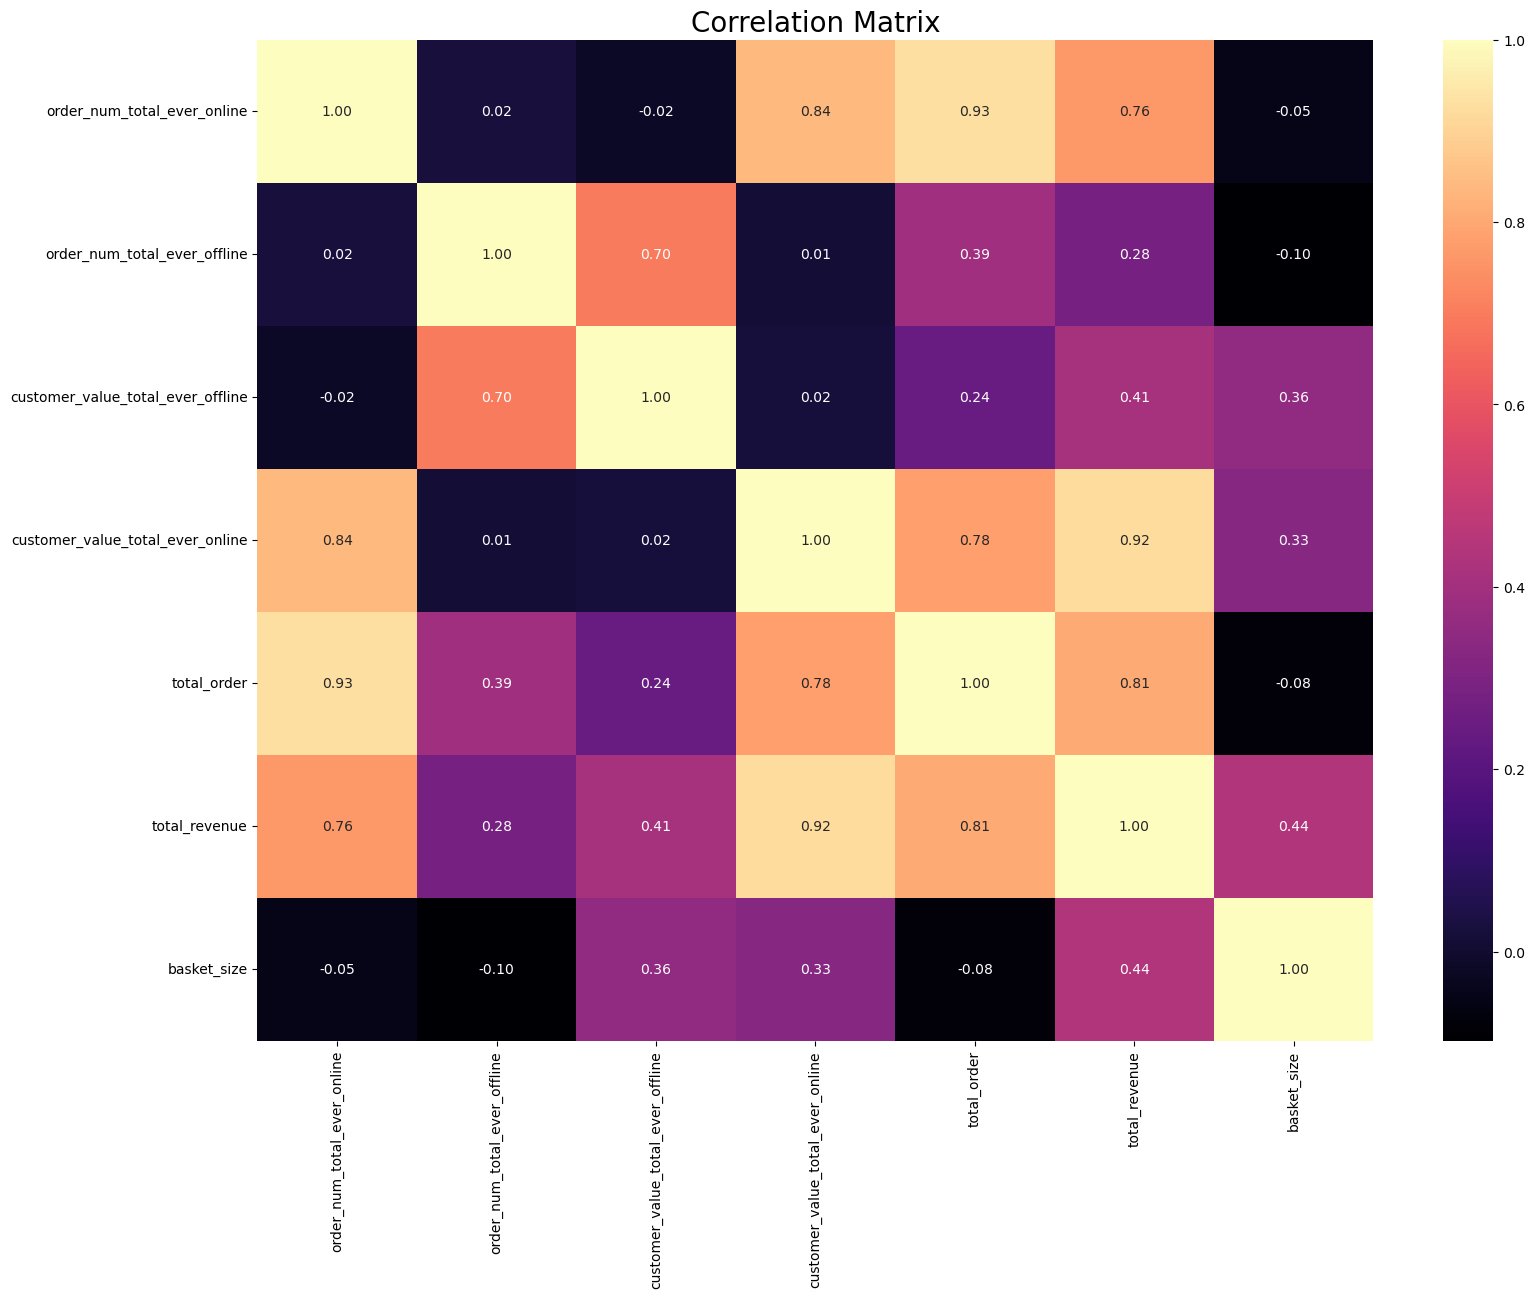

In [92]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# RFM AND K-MEANS CLUSTERING 

In [93]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [94]:
today_date = dt.datetime(2021, 6, 1)
print(today_date)

2021-06-01 00:00:00


In [95]:
today_date = pd.to_datetime(today_date)

In [96]:
df["Tenure"] = df["first_order_date"]

In [97]:
rfm = df.groupby('master_id').agg({'last_order_date': lambda date: (pd.to_datetime(today_date) - pd.to_datetime(date.max())).days,
                               'Tenure': lambda date: (pd.to_datetime(today_date) - pd.to_datetime(date.min())).days,
                                     'total_order': lambda total_order: total_order.sum(),
                                     'total_revenue': lambda total_value: total_value.sum()})

In [98]:
rfm.head()

last_order_date  Tenure  total_order  total_revenue
master_id                                                                                
00016786-2f5a-11ea-bb80-000d3a38a36f               10     560        5.000        776.070
00034aaa-a838-11e9-a2fc-000d3a38a36f              298    2031        3.000        269.470
000be838-85df-11ea-a90b-000d3a38a36f              213     411        4.000        722.690
000c1fe2-a8b7-11ea-8479-000d3a38a36f               27     359        7.000        874.160
000f5e3e-9dde-11ea-80cd-000d3a38a36f               20     323        7.000       1620.330

In [99]:
rfm.shape

(19606, 4)

In [100]:
rfm.columns

Index(['last_order_date', 'Tenure', 'total_order', 'total_revenue'], dtype='object')

In [101]:
rfm.columns = ['Recency', 'Tenure', 'Frequency','Monetary']

rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)] 

rfm.head()

Recency  Tenure  Frequency  Monetary
master_id                                                                 
00016786-2f5a-11ea-bb80-000d3a38a36f       10     560      5.000   776.070
00034aaa-a838-11e9-a2fc-000d3a38a36f      298    2031      3.000   269.470
000be838-85df-11ea-a90b-000d3a38a36f      213     411      4.000   722.690
000c1fe2-a8b7-11ea-8479-000d3a38a36f       27     359      7.000   874.160
000f5e3e-9dde-11ea-80cd-000d3a38a36f       20     323      7.000  1620.330

In [102]:
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels=[1, 2, 3, 4, 5])
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])


rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [103]:
rfm.head()

Recency  Tenure  Frequency  Monetary RecencyScore FrequencyScore MonetaryScore RFM_SCORE
master_id                                                                                                                     
00016786-2f5a-11ea-bb80-000d3a38a36f       10     560      5.000   776.070            1              4             4       144
00034aaa-a838-11e9-a2fc-000d3a38a36f      298    2031      3.000   269.470            5              2             1       521
000be838-85df-11ea-a90b-000d3a38a36f      213     411      4.000   722.690            4              3             4       434
000c1fe2-a8b7-11ea-8479-000d3a38a36f       27     359      7.000   874.160            1              5             4       154
000f5e3e-9dde-11ea-80cd-000d3a38a36f       20     323      7.000  1620.330            1              5             5       155

In [104]:
rfm['RecencyScore'].value_counts()

1    3996
3    3925
5    3918
2    3885
4    3882
Name: RecencyScore, dtype: int64

In [105]:
rfm['RFM_SCORE'].value_counts()

155    773
255    671
511    547
355    508
411    488
311    455
455    433
111    343
211    340
555    331
521    324
144    320
244    314
344    305
444    297
422    290
522    285
322    285
433    267
321    265
533    247
133    245
532    240
122    240
333    239
233    237
412    233
544    233
421    232
243    232
312    231
254    230
343    222
543    219
432    219
443    218
523    217
512    215
332    213
222    212
145    211
143    210
245    209
134    206
212    203
121    198
354    194
154    191
123    190
132    187
232    184
221    180
434    179
112    176
534    175
554    175
334    173
423    173
234    172
454    167
223    157
323    150
345    148
445    141
531    138
545    117
513    116
331    113
413    105
231    101
442     99
324     97
242     96
424     96
313     94
113     93
342     93
542     92
213     89
124     87
224     78
431     77
142     76
524     61
135     60
131     57
235     52
435     50
535     48
153     47
114     43

In [106]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [107]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)

In [108]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
df[["master_id"]].nunique()

master_id    19606
dtype: int64

In [109]:
rfm.head()

Recency  Tenure  Frequency  Monetary RecencyScore FrequencyScore MonetaryScore RFM_SCORE              Segment
master_id                                                                                                                                          
00016786-2f5a-11ea-bb80-000d3a38a36f       10     560      5.000   776.070            1              4             4       144              At_Risk
00034aaa-a838-11e9-a2fc-000d3a38a36f      298    2031      3.000   269.470            5              2             1       521  Potential_Loyalists
000be838-85df-11ea-a90b-000d3a38a36f      213     411      4.000   722.690            4              3             4       434  Potential_Loyalists
000c1fe2-a8b7-11ea-8479-000d3a38a36f       27     359      7.000   874.160            1              5             4       154           Cant_Loose
000f5e3e-9dde-11ea-80cd-000d3a38a36f       20     323      7.000  1620.330            1              5             5       155           Cant_Loose

In [110]:
rfm[rfm["Segment"] == "Loyal_Customers"].head()

Recency  Tenure  Frequency  Monetary RecencyScore FrequencyScore MonetaryScore RFM_SCORE          Segment
master_id                                                                                                                                      
00266a76-312c-11ea-b884-000d3a38a36f      184     558      7.000  1249.580            4              5             5       455  Loyal_Customers
004bec18-9f7a-11e9-a2fc-000d3a38a36f       99    2823     12.000   684.910            3              5             4       354  Loyal_Customers
007e8be6-a871-11e9-a2fc-000d3a38a36f      165    2220      5.000   550.590            4              4             3       443  Loyal_Customers
008073a4-bbab-11ea-a0c9-000d3a38a36f      202     469      5.000   532.820            4              4             3       443  Loyal_Customers
0087ec3e-ad64-11e9-a2fc-000d3a38a36f      121    1041      5.000   390.950            3              4             2       342  Loyal_Customers

In [111]:
rfm[rfm["Segment"] == "Need_Attention"].head()

Recency  Tenure  Frequency  Monetary RecencyScore FrequencyScore MonetaryScore RFM_SCORE         Segment
master_id                                                                                                                                     
0033a502-5bf1-11ea-829b-000d3a38a36f      105     495      4.000   788.730            3              3             4       334  Need_Attention
003c4ebc-aa23-11e9-a2fc-000d3a38a36f      108     792      4.000   360.760            3              3             2       332  Need_Attention
00f53518-ab9e-11e9-a2fc-000d3a38a36f       88    1389      4.000   349.940            3              3             2       332  Need_Attention
012fe082-b134-11e9-9757-000d3a38a36f      136     737      4.000   609.940            3              3             3       333  Need_Attention
019443fe-ab05-11e9-a2fc-000d3a38a36f       88     580      4.000   317.450            3              3             2       332  Need_Attention

In [112]:
rfm["BasketSize"] = rfm["Monetary"] / rfm["Frequency"] 

In [113]:
rfm.head()

Recency  Tenure  Frequency  Monetary RecencyScore FrequencyScore MonetaryScore RFM_SCORE              Segment  BasketSize
master_id                                                                                                                                                      
00016786-2f5a-11ea-bb80-000d3a38a36f       10     560      5.000   776.070            1              4             4       144              At_Risk     155.214
00034aaa-a838-11e9-a2fc-000d3a38a36f      298    2031      3.000   269.470            5              2             1       521  Potential_Loyalists      89.823
000be838-85df-11ea-a90b-000d3a38a36f      213     411      4.000   722.690            4              3             4       434  Potential_Loyalists     180.673
000c1fe2-a8b7-11ea-8479-000d3a38a36f       27     359      7.000   874.160            1              5             4       154           Cant_Loose     124.880
000f5e3e-9dde-11ea-80cd-000d3a38a36f       20     323      7.000  1620.330            1              5             5       155           Cant_Loose     231.476

In [114]:
rfm.shape

(19606, 10)

In [115]:
a = rfm.head(5)

In [116]:
rfm[["Recency"]]

Recency
master_id                                    
00016786-2f5a-11ea-bb80-000d3a38a36f       10
00034aaa-a838-11e9-a2fc-000d3a38a36f      298
000be838-85df-11ea-a90b-000d3a38a36f      213
000c1fe2-a8b7-11ea-8479-000d3a38a36f       27
000f5e3e-9dde-11ea-80cd-000d3a38a36f       20
00136ce2-a562-11e9-a2fc-000d3a38a36f      203
00142f9a-7af6-11eb-8460-000d3a38a36f       25
0014778a-5b11-11ea-9a2c-000d3a38a36f       26
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f      126
0022f41e-5597-11eb-9e65-000d3a38a36f       12
0025f17c-eeaf-11ea-bb5a-000d3a38a36f      186
00263f1a-210a-11ea-b50a-000d3a38a36f      362
00266a76-312c-11ea-b884-000d3a38a36f      184
002bdaa8-9ee9-11ea-80cd-000d3a38a36f       46
003334c0-2b61-11ea-9d27-000d3a38a36f       35
0033a502-5bf1-11ea-829b-000d3a38a36f      105
0033f078-7359-11ea-92d0-000d3a38a36f      360
003705ee-a800-11e9-a2fc-000d3a38a36f      169
003903e0-abce-11e9-a2fc-000d3a38a36f       68
003c4ebc-aa23-11e9-a2fc-000d3a38a36f      108
00414e84-adc6-11e9-a2fc-000d3a38a36f      120
00425f66-5b51-11ea-96d8-000d3a38a36f      199
004bec18-9f7a-11e9-a2fc-000d3a38a36f       99
004d5204-2037-11ea-87bf-000d3a38a36f       27
00521bd0-b0c6-11e9-9757-000d3a38a36f        7
00534fe4-a6b4-11e9-a2fc-000d3a38a36f       63
0053a6ea-ad0a-11e9-a2fc-000d3a38a36f      117
00596df0-abca-11e9-a2fc-000d3a38a36f      213
005c7914-9e78-11e9-9897-000d3a38a36f      279
006633b6-a6b9-11e9-a2fc-000d3a38a36f       61
00663454-520f-11ea-a243-000d3a38a36f       25
0067708e-1ec6-11ea-aa32-000d3a38a36f        7
0067e5b2-5447-11ea-b1db-000d3a38a36f       10
006981e0-66eb-11ea-82da-000d3a38a36f      186
006bb20e-a9a8-11e9-a2fc-000d3a38a36f      188
00736820-a834-11e9-a2fc-000d3a38a36f       26
00740768-d6d7-11e9-93bc-000d3a38a36f       17
00753baa-0090-11ea-a5e8-000d3a38a36f       26
007a2954-4b66-11eb-806e-000d3a38a36f       77
007bc81a-234b-11eb-99f8-000d3a38a36f       63
007cdfe4-1f54-11ea-87bf-000d3a38a36f      355
007e118c-5bf1-11ea-97fc-000d3a38a36f      186
007e8be6-a871-11e9-a2fc-000d3a38a36f      165
008073a4-bbab-11ea-a0c9-000d3a38a36f      202
0082e79e-5b50-11ea-ba9b-000d3a38a36f      318
00842ccc-15ea-11ea-aa74-000d3a38a36f      305
00844650-a937-11e9-a2fc-000d3a38a36f      174
0087ec3e-ad64-11e9-a2fc-000d3a38a36f      121
00898b48-5b92-11ea-a592-000d3a38a36f      348
009293fe-1f3e-11ea-87bf-000d3a38a36f      129
009e2910-1252-11ea-a001-000d3a38a36f       28
00a3f278-ddbe-11e9-9cd3-000d3a38a36f      280
00a5009a-2558-11eb-a59b-000d3a38a36f        6
00a7bc8e-b085-11e9-9757-000d3a38a36f       92
00a9f3a6-5318-11ea-acd3-000d3a38a36f      172
00b37b0c-b0a6-11e9-9757-000d3a38a36f      124
00b38808-541c-11ea-b1db-000d3a38a36f      344
00b3ee24-aa44-11e9-a2fc-000d3a38a36f       24
00c2168c-a875-11e9-a2fc-000d3a38a36f      120
00c4e990-edfb-11e9-9346-000d3a38a36f       64
00d2268e-5b36-11ea-8ca6-000d3a38a36f      140
00d37630-2b32-11ea-9d27-000d3a38a36f       38
00d46324-8f9b-11ea-8f41-000d3a38a36f      186
00dc8510-908d-11eb-bae6-000d3a38a36f        2
00dfa312-e5e4-11e9-ad00-000d3a38a36f       25
00e58b24-5b4b-11ea-ac70-000d3a38a36f      162
00e65764-fe5a-11e9-a5e8-000d3a38a36f      164
00eb056a-38df-11ea-85d6-000d3a38a36f      163
00ede098-9e6e-11e9-9897-000d3a38a36f      332
00ef026e-5428-11ea-b1db-000d3a38a36f       37
00ef42be-15e5-11ea-aa74-000d3a38a36f       51
00f037ce-9fa6-11e9-a2fc-000d3a38a36f       58
00f1f9ce-bbb1-11ea-a0c9-000d3a38a36f      201
00f53518-ab9e-11e9-a2fc-000d3a38a36f       88
00f6c98e-abb5-11e9-a2fc-000d3a38a36f      163
00f6ec78-5b07-11ea-a06d-000d3a38a36f       23
00f7553c-5bbb-11ea-b88d-000d3a38a36f      174
00f9ba18-aab1-11e9-a2fc-000d3a38a36f       43
00fa3c44-748c-11eb-8577-000d3a38a36f        7
00fb8870-d676-11e9-93bc-000d3a38a36f       27
00fd8d32-9d73-11e9-9897-000d3a38a36f       73
01024718-52fa-11ea-9ade-000d3a38a36f       24
01025b92-ae5c-11e9-a2fc-000d3a38a36f       46
01025f80-1193-11ea-846f-000d3a38a36f       27
01047d5e-62c1-11ea-9861-000d3a38a36f       33
0104f00a-4cb8-11ea-a626-000d3a38a36f

# CLUSTERS

In [117]:
import pandas as pd
import argparse
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [118]:
segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore"]]

segment_data.head()

RecencyScore FrequencyScore MonetaryScore
master_id                                                                     
00016786-2f5a-11ea-bb80-000d3a38a36f            1              4             4
00034aaa-a838-11e9-a2fc-000d3a38a36f            5              2             1
000be838-85df-11ea-a90b-000d3a38a36f            4              3             4
000c1fe2-a8b7-11ea-8479-000d3a38a36f            1              5             4
000f5e3e-9dde-11ea-80cd-000d3a38a36f            1              5             5

In [119]:
rfm.head()

Recency  Tenure  Frequency  Monetary RecencyScore FrequencyScore MonetaryScore RFM_SCORE              Segment  BasketSize
master_id                                                                                                                                                      
00016786-2f5a-11ea-bb80-000d3a38a36f       10     560      5.000   776.070            1              4             4       144              At_Risk     155.214
00034aaa-a838-11e9-a2fc-000d3a38a36f      298    2031      3.000   269.470            5              2             1       521  Potential_Loyalists      89.823
000be838-85df-11ea-a90b-000d3a38a36f      213     411      4.000   722.690            4              3             4       434  Potential_Loyalists     180.673
000c1fe2-a8b7-11ea-8479-000d3a38a36f       27     359      7.000   874.160            1              5             4       154           Cant_Loose     124.880
000f5e3e-9dde-11ea-80cd-000d3a38a36f       20     323      7.000  1620.330            1              5             5       155           Cant_Loose     231.476

In [120]:
K = range(2, 12)

for i in K:
    print(i)

2
3
4
5
6
7
8
9
10
11


117874.7041721922
65682.35090698239
48710.75430508034
36306.568732141954
30853.376506883043
26620.42093655733
24879.81474820567
22240.273279830268
20800.932991556452
18874.434095386867
18013.258274083637


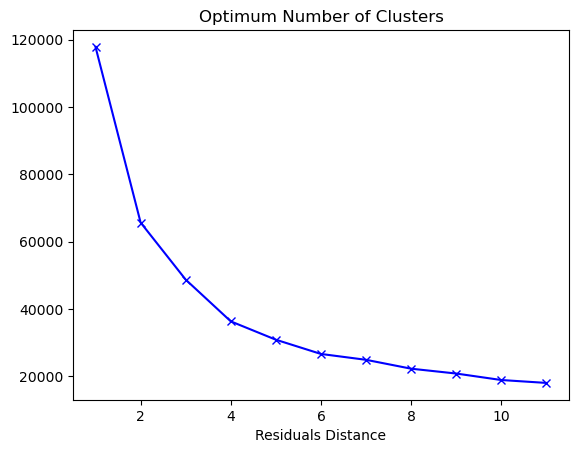

In [121]:
K = range(1, 12)
ssd = []  # define ssd as an empty list
for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()   

In [122]:
kmeans4 = KMeans(n_clusters=4).fit(segment_data)
rfm.head()

Recency  Tenure  Frequency  Monetary RecencyScore FrequencyScore MonetaryScore RFM_SCORE              Segment  BasketSize
master_id                                                                                                                                                      
00016786-2f5a-11ea-bb80-000d3a38a36f       10     560      5.000   776.070            1              4             4       144              At_Risk     155.214
00034aaa-a838-11e9-a2fc-000d3a38a36f      298    2031      3.000   269.470            5              2             1       521  Potential_Loyalists      89.823
000be838-85df-11ea-a90b-000d3a38a36f      213     411      4.000   722.690            4              3             4       434  Potential_Loyalists     180.673
000c1fe2-a8b7-11ea-8479-000d3a38a36f       27     359      7.000   874.160            1              5             4       154           Cant_Loose     124.880
000f5e3e-9dde-11ea-80cd-000d3a38a36f       20     323      7.000  1620.330            1              5             5       155           Cant_Loose     231.476

In [123]:
print(kmeans.inertia_)

18013.258274083637


In [124]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)

117874.7041721922
65682.35090698239
48710.75430508034
36301.4624828415
30788.869424526045
26635.44915036534
24619.767223644776
22325.90921878517
21042.385527374136
19085.07567328122
18127.5890337623


In [125]:
kmeans = KMeans(n_clusters=10).fit(segment_data)

rfm.head()

Recency  Tenure  Frequency  Monetary RecencyScore FrequencyScore MonetaryScore RFM_SCORE              Segment  BasketSize
master_id                                                                                                                                                      
00016786-2f5a-11ea-bb80-000d3a38a36f       10     560      5.000   776.070            1              4             4       144              At_Risk     155.214
00034aaa-a838-11e9-a2fc-000d3a38a36f      298    2031      3.000   269.470            5              2             1       521  Potential_Loyalists      89.823
000be838-85df-11ea-a90b-000d3a38a36f      213     411      4.000   722.690            4              3             4       434  Potential_Loyalists     180.673
000c1fe2-a8b7-11ea-8479-000d3a38a36f       27     359      7.000   874.160            1              5             4       154           Cant_Loose     124.880
000f5e3e-9dde-11ea-80cd-000d3a38a36f       20     323      7.000  1620.330            1              5             5       155           Cant_Loose     231.476

In [126]:
kmeans = KMeans(n_clusters=10).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

In [127]:
segment_data.head(10)

RecencyScore FrequencyScore MonetaryScore  clusters
master_id                                                                               
00016786-2f5a-11ea-bb80-000d3a38a36f            1              4             4         4
00034aaa-a838-11e9-a2fc-000d3a38a36f            5              2             1         5
000be838-85df-11ea-a90b-000d3a38a36f            4              3             4         7
000c1fe2-a8b7-11ea-8479-000d3a38a36f            1              5             4         4
000f5e3e-9dde-11ea-80cd-000d3a38a36f            1              5             5         4
00136ce2-a562-11e9-a2fc-000d3a38a36f            4              1             2         5
00142f9a-7af6-11eb-8460-000d3a38a36f            1              2             2         8
0014778a-5b11-11ea-9a2c-000d3a38a36f            1              2             4         9
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f            3              1             2         1
0022f41e-5597-11eb-9e65-000d3a38a36f            1              1             1         8

In [128]:
segment_data["clusters"].value_counts()

4    2665
5    2603
6    2018
7    2014
1    1972
8    1949
3    1927
0    1862
2    1647
9     949
Name: clusters, dtype: int64

In [129]:
rfm["Segment"].head(10)

master_id
00016786-2f5a-11ea-bb80-000d3a38a36f                At_Risk
00034aaa-a838-11e9-a2fc-000d3a38a36f    Potential_Loyalists
000be838-85df-11ea-a90b-000d3a38a36f    Potential_Loyalists
000c1fe2-a8b7-11ea-8479-000d3a38a36f             Cant_Loose
000f5e3e-9dde-11ea-80cd-000d3a38a36f             Cant_Loose
00136ce2-a562-11e9-a2fc-000d3a38a36f              Promising
00142f9a-7af6-11eb-8460-000d3a38a36f            Hibernating
0014778a-5b11-11ea-9a2c-000d3a38a36f            Hibernating
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f         About_to_Sleep
0022f41e-5597-11eb-9e65-000d3a38a36f            Hibernating
Name: Segment, dtype: object

In [130]:
 segmentation = rfm[["Segment"]].merge(segment_data, on="master_id")

In [131]:
 pd.crosstab(segmentation["Segment"],segmentation["clusters"])

clusters                0     1    2     3     4    5     6     7     8    9
Segment                                                                     
About_to_Sleep          0  1236    0     0     0    0     0   263     0  116
At_Risk               366   101    0  1865   800    0     0     0    57    0
Cant_Loose             40     0    0    62  1865    0     0     0     0    0
Champions               0     0  350     0     0    0   898     0     0    0
Hibernating             0     0    0     0     0    0     0     0  1892  833
Loyal_Customers      1414     0  453     0     0    0  1072     0     0    0
Need_Attention         42   326    0     0     0    0     0   412     0    0
New_Customers           0     0    0     0     0  878     0    41     0    0
Potential_Loyalists     0   309  844     0     0  899    48  1254     0    0
Promising               0     0    0     0     0  826     0    44     0    0

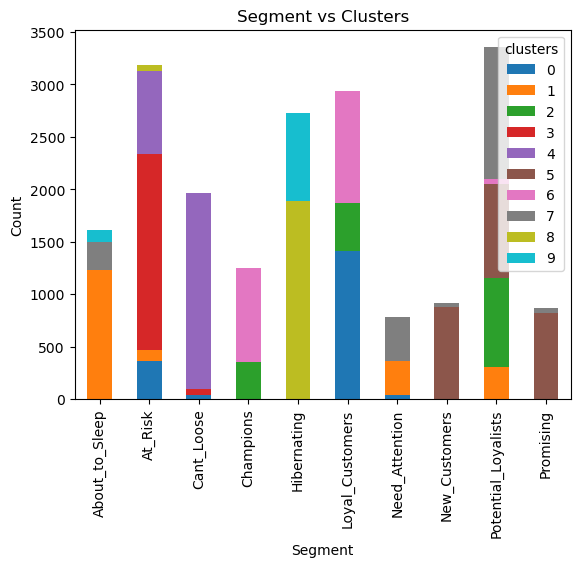

In [132]:
import matplotlib.pyplot as plt

cross_table = pd.crosstab(segmentation["Segment"], segmentation["clusters"])
cross_table.plot(kind="bar", stacked=True)

plt.xlabel("Segment")
plt.ylabel("Count")
plt.title("Segment vs Clusters")

plt.show()


In [133]:
segmentation.head()

Segment RecencyScore FrequencyScore MonetaryScore  clusters
master_id                                                                                                    
00016786-2f5a-11ea-bb80-000d3a38a36f              At_Risk            1              4             4         4
00034aaa-a838-11e9-a2fc-000d3a38a36f  Potential_Loyalists            5              2             1         5
000be838-85df-11ea-a90b-000d3a38a36f  Potential_Loyalists            4              3             4         7
000c1fe2-a8b7-11ea-8479-000d3a38a36f           Cant_Loose            1              5             4         4
000f5e3e-9dde-11ea-80cd-000d3a38a36f           Cant_Loose            1              5             5         4

In [134]:
dfgenel= segmentation.merge(df, on="master_id")

In [135]:
dfgenel.head()

master_id              Segment RecencyScore FrequencyScore MonetaryScore  clusters order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online                   interested_in_categories_12  total_order  total_revenue  basket_size     Tenure
0  00016786-2f5a-11ea-bb80-000d3a38a36f              At_Risk            1              4             4         4        Mobile             Mobile       2019-11-19      2021-05-22             2021-05-22              2020-10-05                        2.000                         3.000                            427.190                           348.880                     [ERKEK, COCUK, AKTIFSPOR]        5.000        776.070      155.214 2019-11-19
1  00034aaa-a838-11e9-a2fc-000d3a38a36f  Potential_Loyalists            5              2             1         5       Desktop            Offline       2015-11-09      2020-08-07             2015-11-09              2020-08-07                        1.000                         2.000                            150.480                           118.990                                [ERKEK, KADIN]        3.000        269.470       89.823 2015-11-09
2  000be838-85df-11ea-a90b-000d3a38a36f  Potential_Loyalists            4              3             4         7   Android App            Offline       2020-04-16      2020-10-31             2020-04-23              2020-10-31                        3.000                         1.000                            365.720                           356.970                       [AKTIFCOCUK, AKTIFSPOR]        4.000        722.690      180.673 2020-04-16
3  000c1fe2-a8b7-11ea-8479-000d3a38a36f           Cant_Loose            1              5             4         4   Android App        Android App       2020-06-07      2021-05-05             2021-05-05              2021-01-29                        3.000                         4.000                            531.190                           342.970  [AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]        7.000        874.160      124.880 2020-06-07
4  000f5e3e-9dde-11ea-80cd-000d3a38a36f           Cant_Loose            1              5             5         4   Android App        Android App       2020-07-13      2021-05-12             2021-05-12              2021-03-13                        5.000                         2.000                            299.980                          1320.350                            [ERKEK, AKTIFSPOR]        7.000       1620.330      231.476 2020-07-13

In [136]:
df_özet = dfgenel[["master_id", "Segment", "clusters", "interested_in_categories_12", "order_channel","total_order", "total_revenue", "basket_size"]]


In [137]:
df_özet.head(50)

master_id              Segment  clusters                   interested_in_categories_12 order_channel  total_order  total_revenue  basket_size
0   00016786-2f5a-11ea-bb80-000d3a38a36f              At_Risk         4                     [ERKEK, COCUK, AKTIFSPOR]        Mobile        5.000        776.070      155.214
1   00034aaa-a838-11e9-a2fc-000d3a38a36f  Potential_Loyalists         5                                [ERKEK, KADIN]       Desktop        3.000        269.470       89.823
2   000be838-85df-11ea-a90b-000d3a38a36f  Potential_Loyalists         7                       [AKTIFCOCUK, AKTIFSPOR]   Android App        4.000        722.690      180.673
3   000c1fe2-a8b7-11ea-8479-000d3a38a36f           Cant_Loose         4  [AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]   Android App        7.000        874.160      124.880
4   000f5e3e-9dde-11ea-80cd-000d3a38a36f           Cant_Loose         4                            [ERKEK, AKTIFSPOR]   Android App        7.000       1620.330      231.476
5   00136ce2-a562-11e9-a2fc-000d3a38a36f            Promising         5                                            []        Mobile        2.000        359.450      179.725
6   00142f9a-7af6-11eb-8460-000d3a38a36f          Hibernating         8                            [COCUK, AKTIFSPOR]   Android App        3.000        404.940      134.980
7   0014778a-5b11-11ea-9a2c-000d3a38a36f          Hibernating         9                                            []   Android App        3.000        727.430      242.477
8   0018c6aa-ab6c-11e9-a2fc-000d3a38a36f       About_to_Sleep         1                                  [AKTIFCOCUK]        Mobile        2.000        317.910      158.955
9   0022f41e-5597-11eb-9e65-000d3a38a36f          Hibernating         8                            [KADIN, AKTIFSPOR]   Android App        2.000        154.980       77.490
10  0025f17c-eeaf-11ea-bb5a-000d3a38a36f  Potential_Loyalists         7                            [KADIN, AKTIFSPOR]       Ios App        4.000        791.970      197.993
11  00263f1a-210a-11ea-b50a-000d3a38a36f  Potential_Loyalists         7                                       [ERKEK]   Android App        3.000        501.940      167.313
12  00266a76-312c-11ea-b884-000d3a38a36f      Loyal_Customers         6                         [ERKEK, COCUK, KADIN]   Android App        7.000       1249.580      178.511
13  002bdaa8-9ee9-11ea-80cd-000d3a38a36f          Hibernating         9                                   [AKTIFSPOR]   Android App        3.000        962.870      320.957
14  003334c0-2b61-11ea-9d27-000d3a38a36f          Hibernating         9                                       [KADIN]   Android App        3.000        512.950      170.983
15  0033a502-5bf1-11ea-829b-000d3a38a36f       Need_Attention         7                            [ERKEK, AKTIFSPOR]        Mobile        4.000        788.730      197.183
16  0033f078-7359-11ea-92d0-000d3a38a36f        New_Customers         5                                       [ERKEK]   Android App        2.000        153.980       76.990
17  003705ee-a800-11e9-a2fc-000d3a38a36f  Potential_Loyalists         5                                   [AKTIFSPOR]       Desktop        3.000        304.260      101.420
18  003903e0-abce-11e9-a2fc-000d3a38a36f              At_Risk         3                                       [KADIN]   Android App        5.000        577.470      115.494
19  003c4ebc-aa23-11e9-a2fc-000d3a38a36f       Need_Attention         1                                       [ERKEK]   Android App        4.000        360.760       90.190
20  00414e84-adc6-11e9-a2fc-000d3a38a36f       About_to_Sleep         1                                       [ERKEK]        Mobile        3.000        303.440      101.147
21  00425f66-5b51-11ea-96d8-000d3a38a36f  Potential_Loyalists         2                                   [AKTIFSPOR]        Mobile        4.000        419.960      104.990
22  004bec18-9f7a-11e9-a2fc-000d3a38a36f      Loyal_

#4 clusters


In [138]:
segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore"]]

segment_data.head()

RecencyScore FrequencyScore MonetaryScore
master_id                                                                     
00016786-2f5a-11ea-bb80-000d3a38a36f            1              4             4
00034aaa-a838-11e9-a2fc-000d3a38a36f            5              2             1
000be838-85df-11ea-a90b-000d3a38a36f            4              3             4
000c1fe2-a8b7-11ea-8479-000d3a38a36f            1              5             4
000f5e3e-9dde-11ea-80cd-000d3a38a36f            1              5             5

In [139]:
kmeans4 = KMeans(n_clusters=4).fit(segment_data)
rfm.head()

Recency  Tenure  Frequency  Monetary RecencyScore FrequencyScore MonetaryScore RFM_SCORE              Segment  BasketSize
master_id                                                                                                                                                      
00016786-2f5a-11ea-bb80-000d3a38a36f       10     560      5.000   776.070            1              4             4       144              At_Risk     155.214
00034aaa-a838-11e9-a2fc-000d3a38a36f      298    2031      3.000   269.470            5              2             1       521  Potential_Loyalists      89.823
000be838-85df-11ea-a90b-000d3a38a36f      213     411      4.000   722.690            4              3             4       434  Potential_Loyalists     180.673
000c1fe2-a8b7-11ea-8479-000d3a38a36f       27     359      7.000   874.160            1              5             4       154           Cant_Loose     124.880
000f5e3e-9dde-11ea-80cd-000d3a38a36f       20     323      7.000  1620.330            1              5             5       155           Cant_Loose     231.476

In [140]:

segment_data["clusters"] = kmeans4.labels_

In [142]:
segment_data.head(10)

RecencyScore FrequencyScore MonetaryScore  clusters
master_id                                                                               
00016786-2f5a-11ea-bb80-000d3a38a36f            1              4             4         1
00034aaa-a838-11e9-a2fc-000d3a38a36f            5              2             1         3
000be838-85df-11ea-a90b-000d3a38a36f            4              3             4         0
000c1fe2-a8b7-11ea-8479-000d3a38a36f            1              5             4         1
000f5e3e-9dde-11ea-80cd-000d3a38a36f            1              5             5         1
00136ce2-a562-11e9-a2fc-000d3a38a36f            4              1             2         3
00142f9a-7af6-11eb-8460-000d3a38a36f            1              2             2         2
0014778a-5b11-11ea-9a2c-000d3a38a36f            1              2             4         2
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f            3              1             2         3
0022f41e-5597-11eb-9e65-000d3a38a36f            1              1             1         2

In [143]:
segment_data["clusters"].value_counts()

3    5456
0    5026
1    4855
2    4269
Name: clusters, dtype: int64

In [144]:
rfm["Segment"].head(10)
segmentation = rfm[["Segment"]].merge(segment_data, on="master_id")


In [145]:
pd.crosstab(segmentation["Segment"],segmentation["clusters"])

clusters                0     1     2     3
Segment                                    
About_to_Sleep        116     0   169  1330
At_Risk                 0  1986  1203     0
Cant_Loose              0  1967     0     0
Champions            1225     0     0    23
Hibernating             0    52  2673     0
Loyal_Customers      2063   850    11    15
Need_Attention        454     0   213   113
New_Customers           7     0     0   912
Potential_Loyalists  1159     0     0  2195
Promising               2     0     0   868

In [146]:
import matplotlib.pyplot as plt

<Axes: xlabel='Segment'>

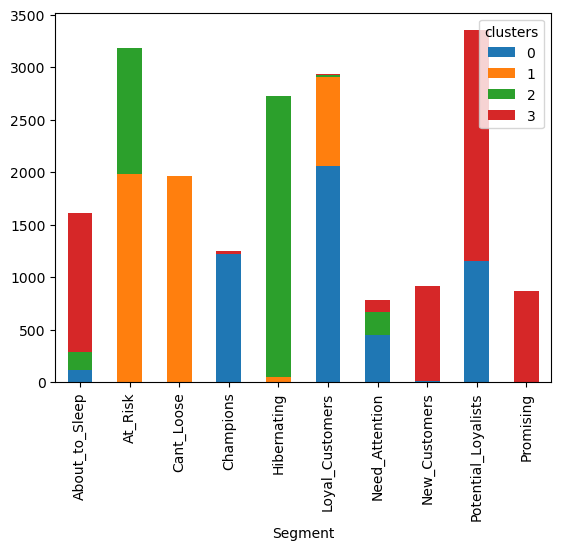

In [147]:
cross_table = pd.crosstab(segmentation["Segment"], segmentation["clusters"])
cross_table.plot(kind="bar", stacked=True)


In [148]:
segmentation.head()

Segment RecencyScore FrequencyScore MonetaryScore  clusters
master_id                                                                                                    
00016786-2f5a-11ea-bb80-000d3a38a36f              At_Risk            1              4             4         1
00034aaa-a838-11e9-a2fc-000d3a38a36f  Potential_Loyalists            5              2             1         3
000be838-85df-11ea-a90b-000d3a38a36f  Potential_Loyalists            4              3             4         0
000c1fe2-a8b7-11ea-8479-000d3a38a36f           Cant_Loose            1              5             4         1
000f5e3e-9dde-11ea-80cd-000d3a38a36f           Cant_Loose            1              5             5         1

In [149]:
dfgenel= segmentation.merge(df, on="master_id")

In [150]:
dfgenel.head()

master_id              Segment RecencyScore FrequencyScore MonetaryScore  clusters order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online                   interested_in_categories_12  total_order  total_revenue  basket_size     Tenure
0  00016786-2f5a-11ea-bb80-000d3a38a36f              At_Risk            1              4             4         1        Mobile             Mobile       2019-11-19      2021-05-22             2021-05-22              2020-10-05                        2.000                         3.000                            427.190                           348.880                     [ERKEK, COCUK, AKTIFSPOR]        5.000        776.070      155.214 2019-11-19
1  00034aaa-a838-11e9-a2fc-000d3a38a36f  Potential_Loyalists            5              2             1         3       Desktop            Offline       2015-11-09      2020-08-07             2015-11-09              2020-08-07                        1.000                         2.000                            150.480                           118.990                                [ERKEK, KADIN]        3.000        269.470       89.823 2015-11-09
2  000be838-85df-11ea-a90b-000d3a38a36f  Potential_Loyalists            4              3             4         0   Android App            Offline       2020-04-16      2020-10-31             2020-04-23              2020-10-31                        3.000                         1.000                            365.720                           356.970                       [AKTIFCOCUK, AKTIFSPOR]        4.000        722.690      180.673 2020-04-16
3  000c1fe2-a8b7-11ea-8479-000d3a38a36f           Cant_Loose            1              5             4         1   Android App        Android App       2020-06-07      2021-05-05             2021-05-05              2021-01-29                        3.000                         4.000                            531.190                           342.970  [AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]        7.000        874.160      124.880 2020-06-07
4  000f5e3e-9dde-11ea-80cd-000d3a38a36f           Cant_Loose            1              5             5         1   Android App        Android App       2020-07-13      2021-05-12             2021-05-12              2021-03-13                        5.000                         2.000                            299.980                          1320.350                            [ERKEK, AKTIFSPOR]        7.000       1620.330      231.476 2020-07-13

In [151]:
df_özet = dfgenel[["master_id", "Segment", "clusters", "interested_in_categories_12", "order_channel","total_order", "total_revenue", "basket_size"]]

In [152]:
df_özet.head()

master_id              Segment  clusters                   interested_in_categories_12 order_channel  total_order  total_revenue  basket_size
0  00016786-2f5a-11ea-bb80-000d3a38a36f              At_Risk         1                     [ERKEK, COCUK, AKTIFSPOR]        Mobile        5.000        776.070      155.214
1  00034aaa-a838-11e9-a2fc-000d3a38a36f  Potential_Loyalists         3                                [ERKEK, KADIN]       Desktop        3.000        269.470       89.823
2  000be838-85df-11ea-a90b-000d3a38a36f  Potential_Loyalists         0                       [AKTIFCOCUK, AKTIFSPOR]   Android App        4.000        722.690      180.673
3  000c1fe2-a8b7-11ea-8479-000d3a38a36f           Cant_Loose         1  [AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]   Android App        7.000        874.160      124.880
4  000f5e3e-9dde-11ea-80cd-000d3a38a36f           Cant_Loose         1                            [ERKEK, AKTIFSPOR]   Android App        7.000       1620.330      231.476

In [153]:
df_özet_görsel=df_özet.groupby(["clusters","Segment","interested_in_categories_12", "order_channel"]).agg({"total_order":"mean", "total_revenue":"mean", "basket_size":"mean"})

In [154]:
df_özet_görsel

total_order  total_revenue  basket_size
clusters Segment             interested_in_categories_12                  order_channel                                         
0        About_to_Sleep      [AKTIFCOCUK, AKTIFSPOR]                      Android App          3.000        792.700      264.233
                             [AKTIFCOCUK, COCUK, AKTIFSPOR]               Ios App              3.000        815.730      271.910
                             [AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]        Android App          3.000        716.260      238.753
                             [AKTIFCOCUK, COCUK, KADIN]                   Desktop              3.000        652.660      217.553
                                                                          Ios App              3.000        774.410      258.137
                             [AKTIFCOCUK, ERKEK, AKTIFSPOR]               Ios App              3.000        670.650      223.550
                                                                          Mobile               3.000        747.010      249.003
                             [AKTIFCOCUK, ERKEK, COCUK, KADIN]            Android App          3.000        668.510      222.837
                             [AKTIFCOCUK, ERKEK, COCUK]                   Android App          2.500        678.635      281.291
                             [AKTIFCOCUK, ERKEK]                          Desktop              3.000        731.050      243.683
                                                                          Ios App              3.000        718.990      239.663
                             [AKTIFCOCUK, KADIN, AKTIFSPOR]               Android App          3.000        672.040      224.013
                                                                          Ios App              3.000        946.830      315.610
                                                                          Mobile               3.000        784.060      261.353
                             [AKTIFCOCUK]                                 Mobile               3.000        707.640      235.880
                             [AKTIFSPOR]                                  Android App          2.941        808.471      276.155
                                                                          Desktop              2.667        804.177      310.274
                                                                          Ios App              3.000        992.594      330.865
                                                                          Mobile               2.909        817.778      291.149
                             [COCUK, KADIN, AKTIFSPOR]                    Desktop              3.000        746.940      248.980
                             [COCUK, KADIN]                               Android App          3.000       1029.800      343.267
                                                                          Desktop              3.000        755.910      251.970
                             [ERKEK, AKTIFSPOR]                           Android App          3.000        893.540      297.847
                             [ERKEK, COCUK, KADIN, AKTIFSPOR]             Android App          3.000        840.150      280.050
                             [ERKEK, COCUK]                               Android App          3.000        662.810      220.937
                             [ERKEK, KADIN, AKTIFSPOR]                    Android App          3.000        791.724      263.908
                                                                          Desktop              3.000        843.705      281.235
                                                                          Ios App              2.000       1192.290      596.145
                                                                          Mobile               3.000        820.340      273.447
                             [ERKEK, KADIN]                               Android App     

In [155]:
df_özet_görsel = df_özet.groupby(["clusters", "Segment", "interested_in_categories_12"]).agg({"master_id": "count"})


In [156]:
df_özet_görsel

master_id
clusters Segment             interested_in_categories_12                            
0        About_to_Sleep      [AKTIFCOCUK, AKTIFSPOR]                               1
                             [AKTIFCOCUK, COCUK, AKTIFSPOR]                        1
                             [AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]                 1
                             [AKTIFCOCUK, COCUK, KADIN]                            2
                             [AKTIFCOCUK, ERKEK, AKTIFSPOR]                        2
                             [AKTIFCOCUK, ERKEK, COCUK, KADIN]                     1
                             [AKTIFCOCUK, ERKEK, COCUK]                            2
                             [AKTIFCOCUK, ERKEK]                                   2
                             [AKTIFCOCUK, KADIN, AKTIFSPOR]                        3
                             [AKTIFCOCUK]                                          1
                             [AKTIFSPOR]                                          39
                             [COCUK, KADIN, AKTIFSPOR]                             1
                             [COCUK, KADIN]                                        2
                             [ERKEK, AKTIFSPOR]                                    3
                             [ERKEK, COCUK, KADIN, AKTIFSPOR]                      1
                             [ERKEK, COCUK]                                        1
                             [ERKEK, KADIN, AKTIFSPOR]                            12
                             [ERKEK, KADIN]                                        3
                             [ERKEK]                                               9
                             [KADIN, AKTIFSPOR]                                   15
                             [KADIN]                                               4
                             []                                                   10
         Champions           [AKTIFCOCUK, AKTIFSPOR]                              13
                             [AKTIFCOCUK, COCUK, AKTIFSPOR]                       14
                             [AKTIFCOCUK, COCUK, KADIN, AKTIFSPOR]                 9
                             [AKTIFCOCUK, COCUK, KADIN]                           21
                             [AKTIFCOCUK, COCUK]                                  25
                             [AKTIFCOCUK, ERKEK, AKTIFSPOR]                        7
                             [AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]                 8
                             [AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]          7
                             [AKTIFCOCUK, ERKEK, COCUK, KADIN]                     5
                             [AKTIFCOCUK, ERKEK, COCUK]                            7
                             [AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]                 2
                             [AKTIFCOCUK, ERKEK, KADIN]                           10
                             [AKTIFCOCUK, ERKEK]                                   8
                             [AKTIFCOCUK, KADIN, AKTIFSPOR]                       20
                             [AKTIFCOCUK, KADIN]                                  14
                             [AKTIFCOCUK]                                         31
                             [AKTIFSPOR]                                         230
                             [COCUK, AKTIFSPOR]                                   16
                             [COCUK, KADIN, AKTIFSPOR]                             8
                             [COCUK, KADIN]                                       43
                             [COCUK]                                              60
                             [ERKEK, AKTIFSPOR]                                   83
                             [ERKEK, COCUK, AKTIFSPOR]                             7
                             [ERKEK, COCUK, KADIN, AKTIFSPOR]                   

In [157]:
df_özet_görsel.sort_values(by=["master_id"], ascending=False)

master_id
clusters Segment             interested_in_categories_12                            
2        Hibernating         []                                                  889
                             [AKTIFSPOR]                                         515
3        Potential_Loyalists [AKTIFSPOR]                                         430
                             [ERKEK]                                             405
                             [KADIN]                                             377
1        At_Risk             [AKTIFSPOR]                                         342
0        Potential_Loyalists [AKTIFSPOR]                                         298
2        Hibernating         [KADIN]                                             287
1        At_Risk             []                                                  284
2        At_Risk             []                                                  278
0        Loyal_Customers     [AKTIFSPOR]                                         257
3        About_to_Sleep      [AKTIFSPOR]                                         256
         New_Customers       [AKTIFSPOR]                                         256
0        Champions           [AKTIFSPOR]                                         230
3        About_to_Sleep      [KADIN]                                             217
         Promising           [AKTIFSPOR]                                         216
2        Hibernating         [ERKEK]                                             191
0        Loyal_Customers     [ERKEK]                                             183
1        At_Risk             [KADIN, AKTIFSPOR]                                  177
3        New_Customers       [KADIN]                                             177
0        Loyal_Customers     [ERKEK, AKTIFSPOR]                                  173
                             [KADIN]                                             169
1        Cant_Loose          [KADIN, AKTIFSPOR]                                  160
                             [AKTIFSPOR]                                         159
0        Champions           [KADIN]                                             159
3        About_to_Sleep      [ERKEK]                                             154
1        Cant_Loose          [ERKEK, KADIN, AKTIFSPOR]                           151
3        Potential_Loyalists [COCUK]                                             151
0        Loyal_Customers     [KADIN, AKTIFSPOR]                                  150
1        Cant_Loose          [ERKEK, AKTIFSPOR]                                  147
         At_Risk             [KADIN]                                             144
3        Promising           [ERKEK]                                             143
0        Champions           [ERKEK]                                             141
3        About_to_Sleep      []                                                  141
2        At_Risk             [AKTIFSPOR]                                         141
         Hibernating         [KADIN, AKTIFSPOR]                                  140
1        At_Risk             [ERKEK]                                             138
2        At_Risk             [KADIN]                                             137
3        New_Customers       [ERKEK]                                             137
0        Potential_Loyalists [ERKEK]                                             130
1        Cant_Loose          []                                                  130
         At_Risk             [ERKEK, AKTIFSPOR]                                  126
0        Loyal_Customers     [ERKEK, KADIN, AKTIFSPOR]                           126
3        Potential_Loyalists [ERKEK, KADIN]                                      124
         Promising           [KADIN]                                             123
0        Loyal_Customers     [ERKEK, KADIN]                                     

In [158]:
df_özet_görsel1 = df_özet.groupby(["clusters", "Segment", "order_channel"]).agg({"master_id": "count"})

In [159]:
df_özet_görsel1

master_id
clusters Segment             order_channel           
0        About_to_Sleep      Android App           53
                             Desktop               12
                             Ios App               19
                             Mobile                32
         Champions           Android App          551
                             Desktop              175
                             Ios App              200
                             Mobile               299
         Loyal_Customers     Android App         1082
                             Desktop              197
                             Ios App              345
                             Mobile               439
         Need_Attention      Android App          207
                             Desktop               62
                             Ios App               70
                             Mobile               115
         New_Customers       Android App            4
                             Desktop                2
                             Mobile                 1
         Potential_Loyalists Android App          528
                             Desktop              175
                             Ios App              213
                             Mobile               243
         Promising           Android App            1
                             Desktop                1
1        At_Risk             Android App         1063
                             Desktop              198
                             Ios App              297
                             Mobile               428
         Cant_Loose          Android App         1234
                             Desktop              119
                             Ios App              285
                             Mobile               329
         Hibernating         Android App           18
                             Desktop               10
                             Ios App                8
                             Mobile                16
         Loyal_Customers     Android App          500
                             Desktop               69
                             Ios App              141
                             Mobile               140
2        About_to_Sleep      Android App           62
                             Desktop               21
                             Ios App               35
                             Mobile                51
         At_Risk             Android App          609
                             Desktop              147
                             Ios App              155
                             Mobile               292
         Hibernating         Android App         1123
                             Desktop              433
                             Ios App              313
                             Mobile               804
         Loyal_Customers     Android App            5
                             Desktop                1
                             Mobile                 5
         Need_Attention      Android App          101
                             Desktop               44
                             Ios App               15
                             Mobile                53
3        About_to_Sleep      Android App          534
                             Desktop              245
                             Ios App              153
                             Mobile               398
         Champions           Android App            6
                             Desktop                4
                             Ios App                3
                             Mobile                10
         Loyal_Customers     Android App            7
                             Desktop                2
                             Ios App                2
                             Mobile                 4
         Need_Attention      Android App        

In [160]:
df_özet_görsel1.sort_values(by=["master_id"], ascending=False)

master_id
clusters Segment             order_channel           
1        Cant_Loose          Android App         1234
2        Hibernating         Android App         1123
0        Loyal_Customers     Android App         1082
1        At_Risk             Android App         1063
3        Potential_Loyalists Android App          879
2        Hibernating         Mobile               804
3        Potential_Loyalists Mobile               610
2        At_Risk             Android App          609
0        Champions           Android App          551
3        About_to_Sleep      Android App          534
0        Potential_Loyalists Android App          528
1        Loyal_Customers     Android App          500
0        Loyal_Customers     Mobile               439
3        Potential_Loyalists Desktop              438
2        Hibernating         Desktop              433
1        At_Risk             Mobile               428
3        About_to_Sleep      Mobile               398
         New_Customers       Android App          353
         Promising           Android App          346
0        Loyal_Customers     Ios App              345
1        Cant_Loose          Mobile               329
2        Hibernating         Ios App              313
0        Champions           Mobile               299
1        At_Risk             Ios App              297
3        Promising           Mobile               293
2        At_Risk             Mobile               292
1        Cant_Loose          Ios App              285
3        Potential_Loyalists Ios App              268
         About_to_Sleep      Desktop              245
0        Potential_Loyalists Mobile               243
3        New_Customers       Mobile               232
0        Potential_Loyalists Ios App              213
         Need_Attention      Android App          207
         Champions           Ios App              200
1        At_Risk             Desktop              198
0        Loyal_Customers     Desktop              197
3        New_Customers       Desktop              196
0        Potential_Loyalists Desktop              175
         Champions           Desktop              175
2        At_Risk             Ios App              155
3        About_to_Sleep      Ios App              153
2        At_Risk             Desktop              147
1        Loyal_Customers     Ios App              141
                             Mobile               140
3        New_Customers       Ios App              131
         Promising           Desktop              131
1        Cant_Loose          Desktop              119
0        Need_Attention      Mobile               115
2        Need_Attention      Android App          101
3        Promising           Ios App               98
0        Need_Attention      Ios App               70
1        Loyal_Customers     Desktop               69
0        Need_Attention      Desktop               62
2        About_to_Sleep      Android App           62
         Need_Attention      Mobile                53
0        About_to_Sleep      Android App           53
3        Need_Attention      Android App           51
2        About_to_Sleep      Mobile                51
         Need_Attention      Desktop               44
         About_to_Sleep      Ios App               35
3        Need_Attention      Mobile                33
0        About_to_Sleep      Mobile                32
3        Need_Attention      Desktop               21
2        About_to_Sleep      Desktop               21
0        About_to_Sleep      Ios App               19
1        Hibernating         Android App           18
                             Mobile                16
2        Need_Attention      Ios App               15
0        About_to_Sleep      Desktop               12
1        Hibernating         Desktop               10
3        Champions           Mobile                10
         Need_Attention      Ios App                8
1        Hibernating         Ios App            

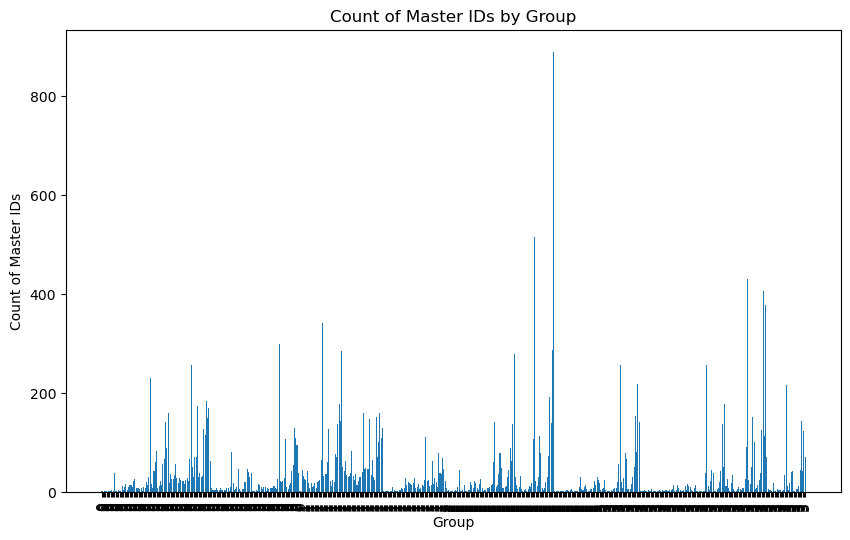

In [161]:
import matplotlib.pyplot as plt

# Reset index to make the grouped columns as regular columns
df_özet_görsel.reset_index(inplace=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_özet_görsel.index, df_özet_görsel["master_id"])
plt.xticks(df_özet_görsel.index, df_özet_görsel["clusters"], rotation=90)  # Customize x-axis labels if needed

# Set the title and labels
plt.title("Count of Master IDs by Group")
plt.xlabel("Group")
plt.ylabel("Count of Master IDs")

# Show the plot
plt.show()


In [162]:
df_özet_görsel=df_özet.groupby(["clusters","Segment","interested_in_categories_12", "order_channel"]).agg

In [163]:
cross_table = pd.crosstab(df_özet["Segment","interested_in_categories_12", "order_channel"], segmentation["clusters"])
cross_table.plot(kind="bar", stacked=True)


KeyError: ('Segment', 'interested_in_categories_12', 'order_channel')

In [ ]:
cross_table = pd.crosstab(index=[df_özet["Segment"], df_özet["interested_in_categories_12"], df_özet["order_channel"]], columns=segmentation["clusters"])
cross_table.plot(kind="bar", stacked=True)
